# **Deep Learning with Python Final Project**

## Reuters Dataset

### **Table of Contents**

- [Input Data](#section1)
- [TYpe of Problem](#problem)
- [Prediction](#prediction)
- [Section 2 Measure of Success](#section2)
- [Section 3 Evaluation Protocol](#section3)
- [Section 4 Preparing Data](#section4)
- [Section 5 Develop Model](#section5)
  - [Smallest Model](#smallest)
- [Section 6 Overfitting](#section6)
- [Section 7 Regularisation and Tuning Hyperparameters](#section7)
- [Section 8 Testing](#section8)

In [1]:
# Loading required libraries

from keras.utils import to_categorical
from keras import regularizers
from keras.callbacks import Callback
import gc
import keras
from keras import layers
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from numpy.lib.function_base import vectorize
import pandas as pd
import collections
import copy

<a name="section1"></a>
### **Section 1 >> Define the Problem**

#### **1.1 Input Data**

The Reuters dataset is a classification dataset consisting of 11,228 newswires from Reuters, which are labelled for 46 topics. Reuters has released a number of datasets, totaling over more than 2 million samples.

The Reuters dataset is included with the Keras library, and the 11,228 samples are automatically split into training and test samples, based on an 80% / 20% split. As shown below, there is initially 8,982 training samples, and 2,246 test samples, based on the split. The dataset will be restricted to the 10,000 most frequently occurring words.

In [68]:
# LOAD THE REUTERS DATASET
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

In [69]:
print(len(train_data), len(test_data))

8982 2246


In [71]:
train_data

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

In [70]:
train_data.shape

(8982,)

In [72]:
type(train_data)

numpy.ndarray

Looking at one sample from the training data (item 15), it is a list of 76 integers, where each integer represents the index value of the 76 words from the newswire, out of the full corpus of words from all 11,228 newswires.

In [4]:
print(train_data[15])

[1, 577, 9, 355, 430, 21, 4, 2222, 5, 4, 83, 181, 73, 418, 171, 1694, 3048, 202, 4596, 11, 15, 6, 750, 4193, 35, 7, 4, 121, 273, 94, 160, 4, 248, 409, 60, 5, 73, 418, 8, 348, 3048, 430, 202, 4073, 11, 15, 6, 566, 158, 35, 577, 910, 335, 6125, 333, 32, 1019, 35, 15, 6, 4459, 557, 35, 232, 218, 377, 563, 55, 772, 6, 30, 1177, 21, 712, 17, 12]


In [5]:
len(train_data[15])

76

There are 46 topics in this dataset, represented as a list of string values. There is not a way to list these topics, but searching online there are a number of references to the following list of the 46 topics:

In [6]:
topics = ['cocoa','grain','veg-oil','earn','acq','wheat','copper','housing','money-supply', 'coffee','sugar','trade','reserves','ship','cotton','carcass','crude','nat-gas', 'cpi','money-fx','interest','gnp','meal-feed','alum','oilseed','gold','tin', 'strategic-metal','livestock','retail','ipi','iron-steel','rubber','heat','jobs',
'lei','bop','zinc','orange','pet-chem','dlr','gas','silver','wpi','hog','lead']

len(topics)

46

Using the 'reuters.get_word_index()' function that lists all words used in the dataset, we can create a dictionary of (index value : word) to take the integer values of any sample and generate the text of that newswire.

Looking at sample 15 that was used above, the newswire is discussing loans from New York banks, and the total values of loans. The label for this newswire is '8', and from the topics list above, item '8' is 'money supply', which is accurate based on the text of the newswire.

In [7]:
word_index = reuters.get_word_index()
reverse_word_index = dict ([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[15]])
print(decoded_newswire)

? commercial and industrial loans on the books of the 10 major new york banks excluding acceptances fell 572 mln dlrs to 64 297 billion in the week ended march 11 the federal reserve bank of new york said including acceptances loans fell 475 mln dlrs to 65 16 billion commercial paper outstanding nationally increased 2 98 billion dlrs to 339 00 billion national business loan data are scheduled to be released on friday reuter 3


In [8]:
train_labels[15]

8

In [9]:
topics[8]

'money-supply'

Note that the 'word_index' and 'reverse_word_index' are dictionaries of all the words in the 11,228 newswires, but that the first three values (0, 1, 2) are reserved values. Therefore, for example, the word 'commercial' is item 574, while above it is listed as '577'.

In [10]:
print(word_index['commercial'])

574


In [11]:
print(reverse_word_index[574])

commercial


In [12]:
print(len(word_index))

30979


<a name="problem"></a>
#### **1.2 Type of Problem**

The Reuters dataset consists of 46 mutually exclusive topics, therefore 46 classess. Each newswire can only be categorized into one of these 46 classes. Therefore, this is a single-label, multi-class classification problem.

To implement this single-label, multi-class problem, the labels need to be vectorized and one-hot encoding will be used. With this, each label will be will be embedded as an all-zero vector with the value of '1' in the place of the label index, for the representative class. This will be discussed and implemented in Section 4.1 of Preparing the Data.

<a name="prediction"></a>
#### **1.3 Prediction Goal**

The Reuters dataset consists of 11,228 newswires categorized in 46 classes. However, not all 46 classes are evenly represented.

As shown in the histograms plots and the pandas dataframe below, most of the newswires are from class '3' and class '4'. For both the training data and the test data, class '3' is greater than 35%, and class '4' is greater than 20%. These two classes are 'earn' and 'acq' (acquisition) respectively, as shown below.

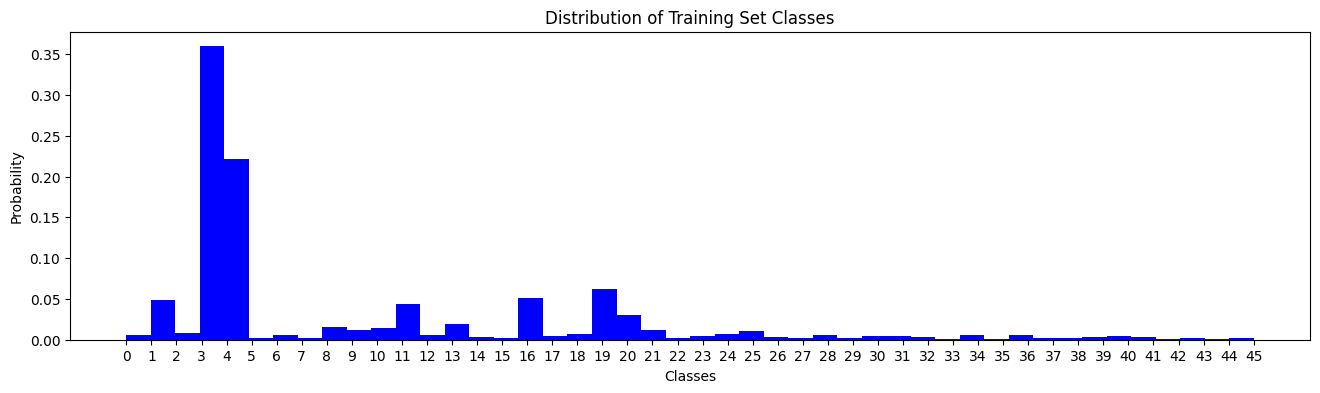

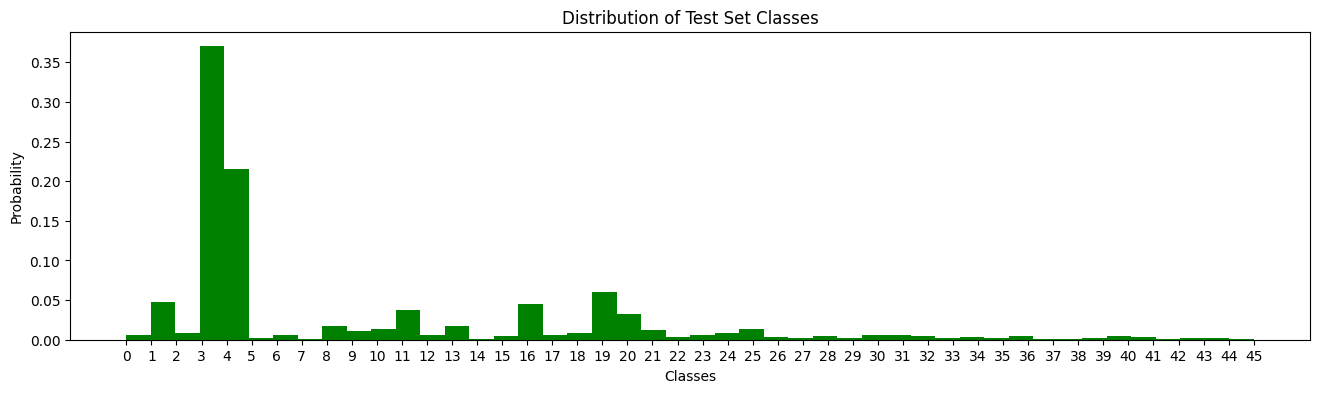

In [13]:
plt.figure(figsize=(16, 4))
plt.hist(train_labels, bins = 46, density=True, facecolor='b')
plt.xticks(np.arange(0, 46))
plt.xlabel('Classes')
plt.ylabel('Probability')
plt.title('Distribution of Training Set Classes')
plt.show()

plt.figure(figsize=(16, 4))
plt.hist(test_labels, bins = 46, density=True, facecolor='g')
plt.xticks(np.arange(0, 46))
plt.xlabel('Classes')
plt.ylabel('Probability')
plt.title('Distribution of Test Set Classes')
plt.show()


Viewing the distribution of the samples according to the frequency of each of the 46 classes is shown below using a pandas dataframe.

In [14]:
# The following code was found on Stack Overflow, but modified and updated for this specific requirement.
trainL = collections.Counter(train_labels)
classes =[]
frequency =[]

for i in range(len(trainL.most_common(44))):
    classes.append(trainL.most_common(44)[i][0])
    frequency.append(trainL.most_common(44)[i][1])

# Showing the top 20 classes based on the number of samples per class
df = pd.DataFrame(data = {'Class':classes,'Number of Samples':frequency})
df[:20]

,Class,Number of Samples
0,3,3159
1,4,1949
2,19,549
3,16,444
4,1,432
5,11,390
6,20,269
7,13,172
8,8,139
9,10,124


In [15]:
topics[3:5]

['earn', 'acq']

While there are 46 classes, **the random baseline** of this single-label, multi-class classification problem is therefore not 2.2% (1 / 46). Instead, given that 2 classes represent ~55% of total newswires, **the random baseline** is ~18% as calculated below.


In [16]:
testL_copy = copy.copy(test_labels)
np.random.shuffle(testL_copy)
match_array = np.array(test_labels) == np.array(testL_copy)
match_array.mean()

0.19991095280498664

**Therefore, any deep learning model needs to perform better than random baseline of 19% accuracy to be considered an improvement in the model for using information in the training data to make predictions that generalize.**

<a name="section2"></a>
### **Section 2 >> Choosing a Measure of Success**

#### **2.1 Accuracy**

Accuracy measure the fraction of samples that are correctly classified, during the training, validation and testing phases. Obviously the goal is to achieve as close to 100% accuracy as possible for the testing stage when the model is test on un-seen data.

#### **2.2 Precision and Recall**

Precision is 'positive predictive value', and shows how often the model is correct when predicting a target class (i.e., positive versus negative). Precision seeks to correctly predict the true class (i.e., positive) as often as possible, and not predict a class value that is 'false'. Precision is calculated as:

            True Positive
    --------------------------------
    (True Positive + False Positive)

Recall is known as 'sensitivity' or the 'true positive rate', and is a measure of how often the model can find all samples of the target calss (i.e., all positives, or all negatives). Recall Recall is calculated as:

            True Positive
    --------------------------------
    (True Positive + False Negative)

#### **2.3 Area Under a Receiver Operating Characteristic Curve (ROC AUC)**

ROC is a probability curve, and AUC measures the degree of separability. These curves descibe how capable the model is of distinguishing between classes.

ROC is a binary classification tool, but 'one-versus-the-rest (OvR) multi-class ROC can be used for the Reuters model.

**Accuracy will be used to start for this Section.**

**However, all of the above measures can be used for a single-lable multi-class classification problem that exists with the Reuters dataset. As such, each will be examined to evaluate the success of the model.**

<a name="section3"></a>
### **Section 3 >> Deciding on an Evaluation Protocol**

#### **3.1 Hold-out**

Using a hold-out validation set is a good method when the model has plenty of data to work with. For the Reuters model with 11,228 samples, hold-out would be a suitable evaluation protocol of the training stage.

#### **3.2 K-fold cross-validation**

The K-fold cross-validation approach is used when there are too few samples for a hold-out valiation set to be reliable. With this approach, the data is split into K partitions of equal size, the model is trained on 'K - 1' partitions and then valided on the unused partition. Using K-fold cross validation is helpful when performance of the model shows sigificant performance differences between the training and test evaluations. Since the Reuters model has 11,228 samples and hold-out can be used, K-fold cross-validation would not be required.

#### **3.3 Iterated K-fold validation**

Iterated K-fold validation is used when little data is available. This approach applies the K-fold cross-validation multiple times, shuffling the data every time between runs before splitting the data into the K partitions. Since the Reuters model has 11,228 samples and hold-out can be used, K-fold cross-validation would not be required.

**Hold-out validation will be used to evaluate the training stages.**

<a name="section4"></a>
### **Section 4 >> Preparing the Data**

#### **4.1 Manipulte into Tensors**

For the single-lable multi-class Reuters classification problem, the labels need to be vectorized. The data will be vectorized using a NumPy library while the labels will use one-hot encoding using a built-in Keras function. With this, each label will be will be embedded as an all-zero vector with the value of '1' in the place of the label index, for the representative class.

For the training data, the 'vectorize_sequences' function from Deep Learning with Python will be used. The dimension for this function will be 30,982 since all the words in the Reuters dataset are being used

The Keras library includes the 'to_categorical' function, which is used below for both the training labels and the test labels. As shown, the training label for class '1' consists of 45 '0s' and one '1' at the fifth position of the vector.

In [17]:
# the following code was presented in the Deep Learning with Python, Francois Chollet
def vectorize_sequences(sequences, dimension = 30982):

  '''To set indices to '1' for each word of each newswire.
  All corpus of the 10,000 most frequently occuring words of the dataset were used.
  For words from the corpus not in each newswire, indices are set to '0'.
  '''

  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.
  return results

In [18]:
# vectorize both the training and test data, as well as the training and test labels
xTrain = vectorize_sequences(train_data)
xTest = vectorize_sequences(test_data)
yTrain = to_categorical(train_labels)
yTest = to_categorical(test_labels)

In [19]:
print(train_data)

[list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12])
 list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12])
 list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59, 89, 90, 67, 139

In [20]:
len(train_data)

8982

In [67]:
type(train_data)

numpy.ndarray

In [66]:
print(train_data[:3])

[list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12])
 list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12])
 list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59, 89, 90, 67, 139

In [22]:
len(train_data[5])

116

In [23]:
xTrain[5]

array([0., 1., 0., ..., 0., 0., 0.])

In [24]:
yTrain[1]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [25]:
len(train_labels)

8982

In [26]:
yTrain.shape

(8982, 46)

In [27]:
len(yTrain[0])

46

#### **4.2 Normalise the Data**

As shown in Section 1, the newswires data (words) are represented as integers. Therefore, it does not need to be normalized.

As shown directly above, the labels have been one-hot encoded, and are either '0s' or a '1'. Therefore, the labels do not need be normalized.

<a name="section5"></a>
### **Section 5 >> Develop the Model**

To develop the smallest model that beats the common-sense baseline for this single-lable, multi-class classification problem.

#### **5.1 Commonsense Baseline**

As shown above, while there are 46 classes, the random baseline of this single-label, multi-class classification problem is not 2.2% (1 / 46). Instead, given that 2 classes represent ~55% of total newswires, **the random baseline is ~19%** as calculated previously.

#### **5.2 Last Layer Activation**

As this is a single-label, multi-class classification problem, the best last-layer activation method to use is **'softmax'**. Softmax is an activation function that assigns probabilities to each possible class. These probabilities will sum to '1', and therefore the goal is to have one of the 46 possible classes having a significantly higher probability for the correct class than the other 45 classes, and as close to '1' as possible.

Activation functions **not suitable** for this problem are:

- Sigmoid similarly has prediction values that range between 0 and 1, but will not constrain the summation to 1. Sigmoid is best used with multi-label classification problem where more than 'one right answer' can occur, and therefore will not attempt to predict one answer that 'softmax' will do.
- ReLU (rectified linear units) can be used as an activation layer, but it generally used as a hidden layer, and is used to avoid 'the vanishing gradient problem' when gradients become unusably small for backpropagation.

#### **5.3 Loss Function**

As this is a single-label, multi-class classification problem, the best loss function to use is **'categorical cross-entropy'**. This loss function is also known as 'softmax loss', so it therefore appropriate to use with the softmax activation. With categorical cross-entropy, the output probability distributions calculated by the softmax activation are measured against the 'truth values'.

With softmax activitation, the probabilities will be a range of the 46 classes. If the model has strong generalization predictive power, then the predicted class value will be very close to '1', the remaining 45 classes will have values very close to '0', and then the categorical cross-entory loss function will be close to 0.

Note, that since the labels have been encoded using categorical encoding (or one-hot encoding), 'categorical cross-entroy' is used. If the labels were vectors, then 'sparse categorical cross-entropy' would be used for the loss function, using the same comparisons.

Binary cross-entropy would not be a suitable loss function, this this is not a binary classification probelem. Additionally, mean-squared error would not be a suitable loss function as it is best for regression problems comparing the prediction with the regression line.

#### **5.4 Optimiser**

For Section 5, **'RMSprop'** will be used to build the smallest model possible that still beats the common-sense baseline. RMSprop (root mean square propagation) is an algorithm introduced by Geoff Hinton, and is calculated using a moving average of the squared gradient for each weight.

If needed, other gradient descent optimizers will be explored, including:

- Adam (Adaptive Moment Estimation), which is similar to RMSprop, but it also tracks the average of gradients
- Adadelta, which is very similar to RMSprop, and is an extension of Adagrad
- Adagrad, an improvement of SGD, by updating learning rates differently for frequently occurring features versus infrequent features
- SGD (stochastic gradient descent), a simple baseline gradient descent algorithm that updates learning rate and momentum betweeen batches to optimize the model's weights

In [28]:
# Set aside the validation data of 1,000 samples, and keep the remaining data for training
xVal = xTrain[:1000]
partialXtrain = xTrain[1000:]
yVal = yTrain[:1000]
partialYtrain = yTrain[1000:]

<a name="smallest"></a>
#### **Smallest Model**

To develop the smallest model possible, there will be one hidden layer and then the final layer will have an outpout size of 46 (for the 46 classes). For the hidden layer, **'softplus' is used instead of 'ReLU'**, providing a smoothed equivelent of ReLU where the output is always positive. For this layer, an output size of 2 will be defined.

The main difference is that ReLU will output the input directly if it is positive, otherwise, it will output '0'. The idea is that any inputs that do not impact the following layer will be 'switched off'. In comparison, with 'softplus' as outputs approach '0' the function is smooth and differentiable. Additionally, low impacting inputs still have positive values, although these become asymptotic to '0'.

Therefore, ReLU and versions of ReLU are preferred to 'softplus', and 'softplus' is generally not used often anymore. For the purpose of generating the smallest model possible, 'softplus' will however be used.

In [29]:
model = keras.Sequential ([
    layers.Dense(2, activation = "softplus"),
    layers.Dense(46, activation = "softmax")
])

For the compile step, to achieve the smallest model possible, **stochastic gradient descent (SGD) will be used with a learning rate of 1.0**. For this step, SGD is a simpler algorithm than RMSprop, converges slower than RMSprop, and so is better for this step. Additionally, the incorrectly high learning rate of 1.0 is used, which can lead to overshooting the proper fit.

In [30]:
model.compile(optimizer = keras.optimizers.SGD(1.), loss = "categorical_crossentropy", metrics = ["accuracy"])

For the fit step, to generate the smallest model possible a batch size of only 4 will be used, and this will be run for 8 epochs to track the accuracy. As can be seen in the output, the **accuracy stalls** at just over 33%.

In [31]:
historySmallest = model.fit(partialXtrain, partialYtrain, epochs = 8, batch_size = 4, validation_data = (xVal, yVal))

Epoch 1/8


1996/1996 [==============================] - 4s 2ms/step - loss: 2.4258 - accuracy: 0.3544 - val_loss: 2.4191 - val_accuracy: 0.3540
Epoch 2/8
1996/1996 [==============================] - 3s 1ms/step - loss: 2.4161 - accuracy: 0.3454 - val_loss: 2.4019 - val_accuracy: 0.3500
Epoch 3/8
1996/1996 [==============================] - 2s 1ms/step - loss: 2.4373 - accuracy: 0.3441 - val_loss: 2.4489 - val_accuracy: 0.3540
Epoch 4/8
1996/1996 [==============================] - 2s 1ms/step - loss: 2.4605 - accuracy: 0.3264 - val_loss: 2.4293 - val_accuracy: 0.3540
Epoch 5/8
1996/1996 [==============================] - 2s 1ms/step - loss: 2.4601 - accuracy: 0.3326 - val_loss: 2.4408 - val_accuracy: 0.3540
Epoch 6/8
1996/1996 [==============================] - 2s 1ms/step - loss: 2.4577 - accuracy: 0.3286 - val_loss: 2.4374 - val_accuracy: 0.3540
Epoch 7/8
1996/1996 [==============================] - 2s 1ms/step - loss: 2.4644 - accuracy: 0.3254 - val_loss: 2.4351 - val_accuracy: 0.35

In [32]:
print(historySmallest.history['accuracy'])

[0.3544224500656128, 0.34540215134620667, 0.34414932131767273, 0.3263593018054962, 0.3326233923435211, 0.32861438393592834, 0.325357049703598, 0.32999247312545776]


In [33]:
print(historySmallest.history['val_accuracy'])

[0.3540000021457672, 0.3499999940395355, 0.3540000021457672, 0.3540000021457672, 0.3540000021457672, 0.3540000021457672, 0.3540000021457672, 0.3540000021457672]


In [34]:
lossSmallest = historySmallest.history["loss"]
accSmallest = historySmallest.history["accuracy"]
valLossSmallest = historySmallest.history["val_loss"]
valAccSmallest = historySmallest.history["val_accuracy"]
epochsSmallest = range(1, len(lossSmallest) + 1)

Plotting the output of the training and validation steps shows the accuracy for each of the eight epochs, initially at 38% but then falling to ~33%.

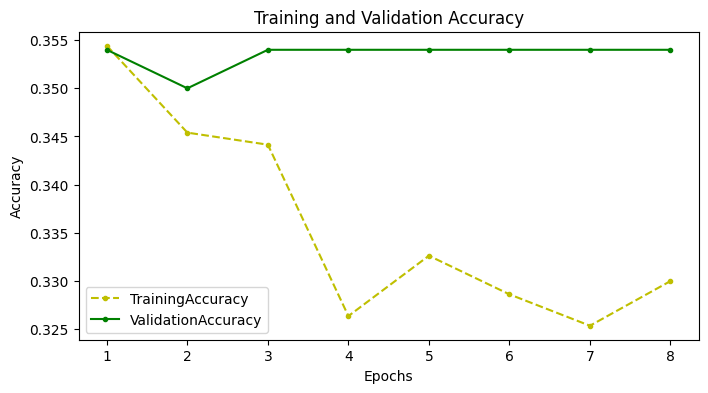

In [35]:
plt.figure(figsize=(8, 4))
plt.plot(epochsSmallest, accSmallest, "y.--", label = "TrainingAccuracy")
plt.plot(epochsSmallest, valAccSmallest, "g.-", label = "ValidationAccuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.xticks(epochsSmallest)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<a name="section6"></a>
### **Section 6 >> Develop a Model that Overfits**

To scale up the model, and to demonstrate over-fitting for the training and validation during the fit step.

#### **6.1 Scaling Up**

For the scale-up step, two hidden layers will be used for deep learning,  improved activation functions will be used, and the layers will be made larger with greater output size. For the compile step, improved optimizers will be used, and for the fit step, larger batch sizes will be leveraged.

In [36]:
def modelBuildSmall(L1, L2, L3, act1, act2, act3, optimizer, version):

  '''
  Build the model, using three layers.
  The compile step can use different optimizers.
  The loss function will be 'categorical cross-entropy.
  Accuracy will be the metric used.
  '''

  model = "model" + str(version)
  model = keras.Sequential()
  model.add(layers.Dense(L1, activation = act1))
  model.add(layers.Dense(L2, activation = act2))
  model.add(layers.Dense(L3, activation = act3))
  model.compile(optimizer = str(optimizer), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

def modelTrainSmall(model, epochs, batch_size):

  '''
  Train the model, using training data and training labels.
  Epochs and batch size defined when function is called.
  Validation data and validation labels then used to validate the model.
  Callback defined to print outputs every 20 epochs.
  '''

  return model.fit(partialXtrain, partialYtrain, epochs = epochs, batch_size = batch_size, validation_data = (xVal, yVal), verbose = 0, callbacks=[EpochOutput(interval = 10)])

def plotSmall(phase, sub):

  '''
  Create two vertical plots showing the training and validation loss and accuracy.
  A super title details the loss versus accuracy results, and the title shows the batch size.
  '''

  plt.figure(figsize=(6, 3))
  plt.subplot(1, 2, 1)
  plt.plot(range(1, len(lossScaled) + 1), lossScaled, "g.--", label = "Training Loss")
  plt.plot(range(1, len(lossScaled) + 1), valLossScaled, "b.-", label = "Validation Loss")
  plt.suptitle("Training and Validation Loss: " + phase, fontsize=10)
  plt.title("Batch: " + sub, fontsize=8)
  plt.xlabel("Epochs")
  plt.xticks(np.arange(1, len(lossScaled) + 2, 10))
  plt.ylabel("Loss", fontsize = 8)
  plt.legend(fontsize = 4)

  plt.subplot(1, 2, 2)
  plt.plot(range(1, len(lossScaled) + 1), accScaled, "y.--", label = "Training Accuracy")
  plt.plot(range(1, len(lossScaled) + 1), valAccScaled, "g.-", label = "Validation Accuracy")
  plt.suptitle("Training and Validation Accuracy: " + phase, fontsize=10)
  plt.title("Batch: " + sub, fontsize=8)
  plt.xlabel("Epochs")
  plt.xticks(np.arange(1, len(lossScaled) + 2, 10))
  plt.ylabel("Accuracy", fontsize = 8)
  plt.legend(fontsize = 4)

  plt.tight_layout()
  plt.show()

# Basesline code found on Stack Overflow, updated and modified for this requirement

class EpochOutput(Callback):
    def __init__(self, interval=10):
        super().__init__()
        self.interval = interval

    def on_epoch_end(self, epoch, logs=None):
        if (int(epoch) % self.interval) == 0:
            print(
                f"Epoch: {epoch:>3}"
                + f" | Loss: {logs['loss']:.4e}"
                + f" | Accuracy: {logs['accuracy']:.4e}"
                + f" | Validation loss: {logs['val_loss']:.4e}"
                + f" | Validation accuracy: {logs['val_accuracy']:.4e}"
            )

**Iterative process** to evaluate:

- various output unit sizes for Layer 1 and Layer 2
- SELU versus ReLU activation functions
- number of epochs set to 40, since over-fitting always occurs by epoch 10
- various batch sizings

These evaluation criteria are defined in lists to allow the functions to iterate through each list to evaluate the model.

In [37]:
layer1 = [128, 128, 256, 256, 512, 512]
layer2 = [128, 128, 256, 256, 512, 512]
activation1 = ['relu', 'selu', 'relu', 'selu', 'relu', 'selu']
activation2 = ['relu', 'selu', 'relu', 'selu', 'relu', 'selu']
numEpochs = [40, 40, 40, 40, 40, 40]
batchSizing = [128, 128, 256, 256, 512, 512]

Using 6 loops, iterete through the six values in the lists above, calling the 'modelBuild' and 'modelTrain' functions defined above. Based on the model results, call the 'plotEpochs' function from above to show the training and validation loss and accuracy results.

<IPython.core.display.Javascript object>


------------------------------------------------------------------------------------------------
STAGE: 0
------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
Epoch:   0 | Loss: 1.6211e+00 | Accuracy: 6.4495e-01 | Validation loss: 1.0979e+00 | Validation accuracy: 7.6100e-01
Epoch:  10 | Loss: 1.3894e-01 | Accuracy: 9.5578e-01 | Validation loss: 1.0593e+00 | Validation accuracy: 7.8400e-01
Epoch:  20 | Loss: 1.0581e-01 | Accuracy: 9.5778e-01 | Validation loss: 1.0093e+00 | Validation accuracy: 8.0600e-01
Epoch:  30 | Loss: 9.1648e-02 | Accuracy: 9.5490e-01 | Validation loss: 1.0566e+00 | Validation accuracy: 8.1300e-01

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               3965824   
          

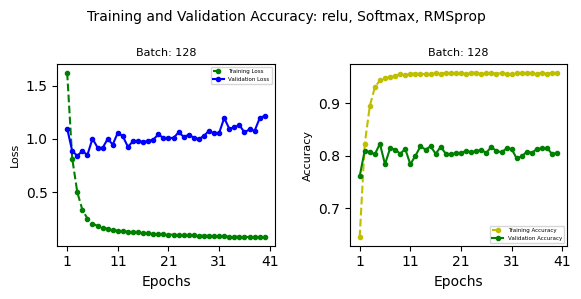


Minimum validation loss at: 3 epochs.

------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
STAGE: 1
------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
Epoch:   0 | Loss: 1.2585e+00 | Accuracy: 7.2601e-01 | Validation loss: 9.0293e-01 | Validation accuracy: 7.9800e-01
Epoch:  10 | Loss: 1.3103e-01 | Accuracy: 9.5477e-01 | Validation loss: 9.7719e-01 | Validation accuracy: 7.9400e-01
Epoch:  20 | Loss: 1.0124e-01 | Accuracy: 9.5427e-01 | Validation loss: 1.0406e+00 | Validation accuracy: 8.0500e-01
Epoch:  30 | Loss: 8.7510e-02 | Accuracy: 9.5665e-01 | Validation loss: 1.0387e+00 | Validation accuracy: 8.0900e-01

Model: "sequential_2"
_________________________________________________________________
 Layer

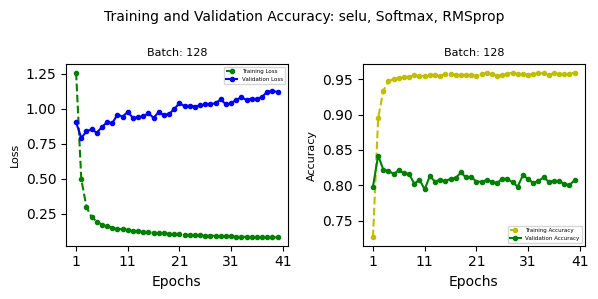


Minimum validation loss at: 2 epochs.

------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
STAGE: 2
------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
Epoch:   0 | Loss: 1.7696e+00 | Accuracy: 6.2015e-01 | Validation loss: 1.3230e+00 | Validation accuracy: 6.7900e-01
Epoch:  10 | Loss: 1.3644e-01 | Accuracy: 9.5665e-01 | Validation loss: 9.3915e-01 | Validation accuracy: 8.1400e-01
Epoch:  20 | Loss: 1.0047e-01 | Accuracy: 9.5603e-01 | Validation loss: 9.1144e-01 | Validation accuracy: 8.2200e-01
Epoch:  30 | Loss: 8.1875e-02 | Accuracy: 9.5828e-01 | Validation loss: 1.0450e+00 | Validation accuracy: 8.0700e-01

Model: "sequential_3"
_________________________________________________________________
 Layer

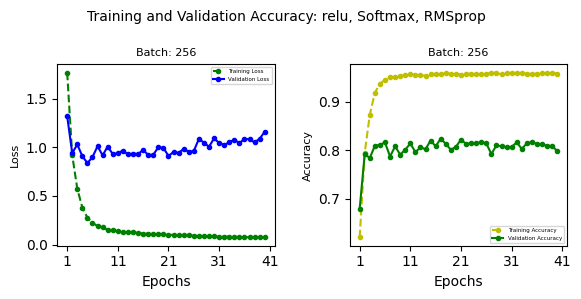


Minimum validation loss at: 5 epochs.

------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
STAGE: 3
------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
Epoch:   0 | Loss: 1.3733e+00 | Accuracy: 7.0020e-01 | Validation loss: 9.0830e-01 | Validation accuracy: 7.9500e-01
Epoch:  10 | Loss: 1.3574e-01 | Accuracy: 9.5578e-01 | Validation loss: 9.3395e-01 | Validation accuracy: 8.1000e-01
Epoch:  20 | Loss: 1.0695e-01 | Accuracy: 9.5590e-01 | Validation loss: 9.6454e-01 | Validation accuracy: 8.0400e-01
Epoch:  30 | Loss: 9.0071e-02 | Accuracy: 9.5916e-01 | Validation loss: 1.0033e+00 | Validation accuracy: 8.0500e-01

Model: "sequential_4"
_________________________________________________________________
 Layer

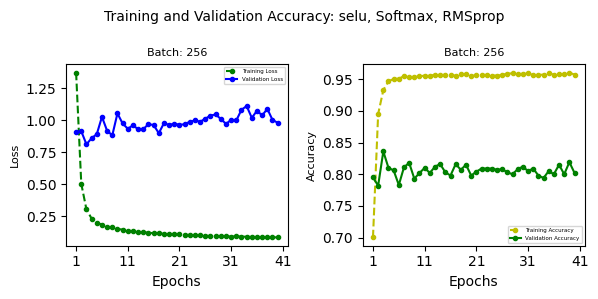


Minimum validation loss at: 3 epochs.

------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
STAGE: 4
------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
Epoch:   0 | Loss: 2.0287e+00 | Accuracy: 5.3495e-01 | Validation loss: 1.3064e+00 | Validation accuracy: 6.8600e-01
Epoch:  10 | Loss: 1.4158e-01 | Accuracy: 9.5427e-01 | Validation loss: 8.5583e-01 | Validation accuracy: 8.2100e-01
Epoch:  20 | Loss: 1.0156e-01 | Accuracy: 9.5640e-01 | Validation loss: 9.0268e-01 | Validation accuracy: 8.2300e-01
Epoch:  30 | Loss: 8.5658e-02 | Accuracy: 9.5828e-01 | Validation loss: 9.5748e-01 | Validation accuracy: 8.1000e-01

Model: "sequential_5"
_________________________________________________________________
 Layer

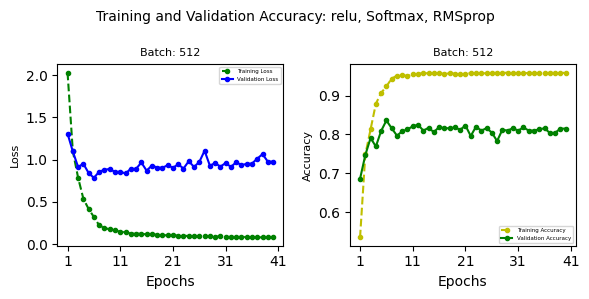


Minimum validation loss at: 6 epochs.

------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
STAGE: 5
------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
Epoch:   0 | Loss: 1.8421e+00 | Accuracy: 6.0874e-01 | Validation loss: 9.7317e-01 | Validation accuracy: 7.8800e-01
Epoch:  10 | Loss: 1.4995e-01 | Accuracy: 9.5490e-01 | Validation loss: 1.0365e+00 | Validation accuracy: 8.0100e-01
Epoch:  20 | Loss: 1.1852e-01 | Accuracy: 9.5603e-01 | Validation loss: 9.7897e-01 | Validation accuracy: 8.0100e-01
Epoch:  30 | Loss: 1.0222e-01 | Accuracy: 9.5803e-01 | Validation loss: 1.0329e+00 | Validation accuracy: 8.0500e-01

Model: "sequential_6"
_________________________________________________________________
 Layer

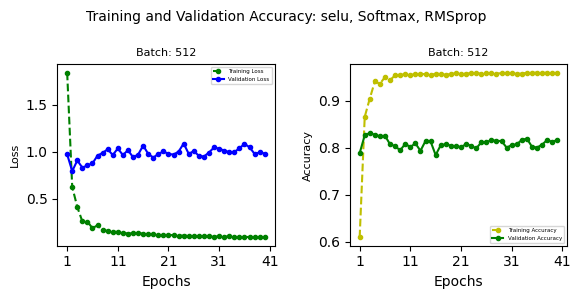


Minimum validation loss at: 2 epochs.

------------------------------------------------------------------------------------------------


In [38]:
# the following code is used to increase the output cell height, and it was found on Stack Overflow
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 20000})'''))

epochsDict = {} # dictionary to store the minimum validation losses for each iteration loop

# the following code is my original code
for x in range(6):
  # Layer 1 outputs, Layer 2 outputs, Layer 3 outputs, Layer 1 activation, Layer 2 activation, Layer 3 activation, optimizer, model version
  model = modelBuildSmall(layer1[x], layer2[x], 46, activation1[x], activation2[x], "softmax", "rmsprop", "C")
  print("------------------------------------------------------------------------------------------------")
  print("STAGE: " + str(x))
  print("------------------------------------------------------------------------------------------------")
  print("------------------------------------------------------------------------------------------------")
  # model, epochs, batch size
  historyScaled = modelTrainSmall(model, numEpochs[x], batchSizing[x])

  lossScaled = historyScaled.history["loss"]
  accScaled = historyScaled.history["accuracy"]
  valLossScaled = historyScaled.history["val_loss"]
  valAccScaled = historyScaled.history["val_accuracy"]
  epochs = range(1, len(lossScaled) + 1)

  print()
  model.summary()
  print()
  plotTitle = str(activation1[x]) + ", Softmax" +  ", RMSprop"
  batchSize = str(batchSizing[x])
  plotSmall(plotTitle, batchSize)
  print()
  minValLoss = str(np.argmin(valLossScaled) + 1)
  print("Minimum validation loss at: " + minValLoss + " epochs.")

  epochsDict["minValLoss{0}".format(x)] = minValLoss

  minValLoss = str(np.argmin(valLossScaled) + 1)
  print()
  print("------------------------------------------------------------------------------------------------")


As can be seen in the above "loss" charts, the validation loss quickly falls for a few epochs, generally less than 6. But after that, the loss (or error) starts to increase, and continue rising for the remaining epochs.

Correspondingly, for the "accuracy" charts, the validation accuracy will increase for a few epochs, and then start to flat-line or only slightly increase.

With the Deep Learning with Python exploration of the Reuters dataset, with output units of 64 units for the first two hidden layers, the over-fitting occurred at 9 epochs.

In comparison, with output units starting at 128 and increasing to 512 used here, the over-fitting of the model starts early at between 2 - 6 epochs. This is therefore expected with the larger layers used.

For each model evaluation above, the epoch for the minimum validation loss is output, and a full table is depicted below.

In summary:

- as highlighted above, output units of 128 will be used going forward, since increasing these to 512 does not appear to generate better results
- SELU does not appear to generate better results than ReLU, so ReLU will be used going forward
- increasing the batch size to 512 does not appear to generate better results, so a batch size of 128 will be used going forward

| Output Units | Activation | Batch Size | Epoch Mininmum Validation Loss |
| :----------- | :--------: | :--------: | :----------------------------: |
| 128          |   ReLU     | 128        | 3                              |
| 128          |   SELU     | 128        | 3                              |
| 256          |   ReLU     | 256        | 7                              |
| 256          |   SELU     | 256        | 4                              |
| 512          |   ReLU     | 512        | 5                              |
| 512          |   SELU     | 512        | 3                              |

Based on a number of tests of this model, the number of epochs for the minimum validation loss has ranged up to 10. Based on these, and the dictionary output for the minimum Validation loss below, the average has ranged from 4 - 7. Therefore, for Section 7 of regularising and tuning, 8 epochs will be used.

In the next section, a closer evaluation using 8 epochs will be used, to identify the lowest validation loss values achieved.

In [39]:
print(epochsDict)

{'minValLoss0': '3', 'minValLoss1': '2', 'minValLoss2': '5', 'minValLoss3': '3', 'minValLoss4': '6', 'minValLoss5': '2'}


In [40]:
def modelEight(model, epochs, batch_size):

  '''
  Train the model, using training data and training labels.
  Epochs and batch size defined when function is called.
  Validation data and validation labels then used to validate the model.
  Callback defined to print outputs every 20 epochs.
  '''

  return model.fit(partialXtrain, partialYtrain, epochs = epochs, batch_size = batch_size, validation_data = (xVal, yVal), verbose = 1)

In [41]:
# the following code is used to increase the output cell height, and it was found on Stack Overflow
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 20000})'''))

eightEpochs = [8, 8, 8, 8, 8, 8]
epochsDict = {} # dictionary to store the minimum validation losses for each iteration loop

# the following code is my original code
for x in range(6):
  # Layer 1 outputs, Layer 2 outputs, Layer 3 outputs, Layer 1 activation, Layer 2 activation, Layer 3 activation, optimizer, model version
  model = modelBuildSmall(layer1[x], layer2[x], 46, activation1[x], activation2[x], "softmax", "rmsprop", "C")
  print("------------------------------------------------------------------------------------------------")
  print("STAGE: ", str(x), "Outputs: ", str(layer1[x]), "Batch: ", str(batchSizing[x]))
  print("------------------------------------------------------------------------------------------------")
  # model, epochs, batch size
  historyEight = modelEight(model, eightEpochs[x], batchSizing[x])

  lossEight = historyEight.history["loss"]
  accEight = historyEight.history["accuracy"]
  valLossEight = historyEight.history["val_loss"]
  valAccEight = historyEight.history["val_accuracy"]
  epochs = range(1, len(lossEight) + 1)

  minValLoss = str(np.argmin(valLossScaled) + 1)
  print("Minimum validation loss at: " + minValLoss + " epochs.")

  epochsDict["minValLoss{0}".format(x)] = minValLoss

  minValLoss = str(np.argmin(valLossScaled) + 1)
  print()
  print("------------------------------------------------------------------------------------------------")

<IPython.core.display.Javascript object>

------------------------------------------------------------------------------------------------
STAGE:  0 Outputs:  128 Batch:  128
------------------------------------------------------------------------------------------------
Epoch 1/8
63/63 [==============================] - 2s 25ms/step - loss: 1.6386 - accuracy: 0.6553 - val_loss: 1.1186 - val_accuracy: 0.7560
Epoch 2/8
63/63 [==============================] - 1s 23ms/step - loss: 0.8252 - accuracy: 0.8173 - val_loss: 0.8953 - val_accuracy: 0.8120
Epoch 3/8
63/63 [==============================] - 1s 22ms/step - loss: 0.5058 - accuracy: 0.8928 - val_loss: 0.8588 - val_accuracy: 0.8280
Epoch 4/8
63/63 [==============================] - 1s 22ms/step - loss: 0.3356 - accuracy: 0.9280 - val_loss: 0.8852 - val_accuracy: 0.8110
Epoch 5/8
63/63 [==============================] - 1s 21ms/step - loss: 0.2507 - accuracy: 0.9416 - val_loss: 0.8917 - val_accuracy: 0.8200
Epoch 6/8
63/63 [==============================] - 1s 20ms/step - loss

Based on a visual inspection of the above output, SELU training achieved lower validation loss scores, and specifically it appears that the output units of 512 and the batch size of 512 had the lowest validation scores.

<a name="section7"></a>
### **Section 7 >> Regularising and Tuning Hyperparameters**

After over-fitting, there is a need to apply regularisation and tame over-fitting. This evaluation will be conducted using a **one-factor-at-a-time** (OFAT) method, before combining the best results for a final analysis.

Additionally, care must be taken to avoid **leaking information about the validation process into the model**. Evaluating each of the options below individually will help avoid this issue.

Based on the results above, the inputs used for the model will be:
- output units of 512
- SELU activation
- batch size of 512
- epochs of 8

In addition to dropout, other options that will be explored include:

- additional layers
- other optimizers than RMSprop, such as Adam and Nadam
- L1 and L2 regularisation
- adding a learning rate

#### **7.1 Layers**

To start, an additional layer will be added to determine if the validation loss and accuracy improves. Updating the build and training models, using three and four hidden layers will be tested.

In [42]:
model3Build = keras.Sequential([
    layers.Dense(256, activation = "selu"),
    layers.Dense(256, activation = "selu"),
    layers.Dense(256, activation = "selu"),
    layers.Dense(46, activation = "softmax")
])
model3Build.compile(optimizer = keras.optimizers.RMSprop(), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model3Build.fit(partialXtrain, partialYtrain, epochs = 8, batch_size = 512, validation_data = (xVal, yVal), verbose = 1)

Epoch 1/8
16/16 [==============================] - 2s 84ms/step - loss: 1.7626 - accuracy: 0.6295 - val_loss: 1.0018 - val_accuracy: 0.7780
Epoch 2/8
16/16 [==============================] - 1s 69ms/step - loss: 0.5794 - accuracy: 0.8738 - val_loss: 0.8242 - val_accuracy: 0.8260
Epoch 3/8
16/16 [==============================] - 1s 71ms/step - loss: 0.3562 - accuracy: 0.9202 - val_loss: 0.8911 - val_accuracy: 0.8050
Epoch 4/8
16/16 [==============================] - 1s 75ms/step - loss: 0.2367 - accuracy: 0.9431 - val_loss: 1.1360 - val_accuracy: 0.7570
Epoch 5/8
16/16 [==============================] - 1s 72ms/step - loss: 0.2272 - accuracy: 0.9420 - val_loss: 0.8890 - val_accuracy: 0.8130
Epoch 6/8
16/16 [==============================] - 1s 74ms/step - loss: 0.1904 - accuracy: 0.9468 - val_loss: 0.8597 - val_accuracy: 0.8160
Epoch 7/8
16/16 [==============================] - 1s 73ms/step - loss: 0.1626 - accuracy: 0.9541 - val_loss: 0.9391 - val_accuracy: 0.8040
Epoch 8/8
16/16 [===

As shown in the output above, a visual comparison with the results from the over-fitting stage, the validation loss has not improved with adding a third hidden layer. A fourth hidden layer was also test, with no improvement. Additionally, these tests were run with 128, 256 and 512 output units, with change in a lack of improvement.

Smaller output units for the two hidden layers will also be briefly evaluated, to determine if these should be used for the final model.

In [43]:
outputUnits = [32, 64, 96]

for valA in range(len(outputUnits)):
  print("OutputUnits: ", outputUnits[valA])
  modelReg = keras.Sequential([
    layers.Dense(outputUnits[valA], activation = "selu"),
    layers.Dense(outputUnits[valA], activation = "selu"),
    layers.Dense(46, activation = "softmax")
    ])
  modelReg.compile(optimizer = keras.optimizers.RMSprop(), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  modelReg.fit(partialXtrain, partialYtrain, epochs = 20, batch_size = 512, validation_data = (xVal, yVal), verbose = 0, callbacks=[EpochOutput(interval = 5)])
  print()
  gc.collect()

OutputUnits:  32
Epoch:   0 | Loss: 2.4118e+00 | Accuracy: 5.4310e-01 | Validation loss: 1.7055e+00 | Validation accuracy: 6.3000e-01
Epoch:   5 | Loss: 6.1199e-01 | Accuracy: 8.8136e-01 | Validation loss: 9.5320e-01 | Validation accuracy: 7.9900e-01
Epoch:  10 | Loss: 2.5546e-01 | Accuracy: 9.4538e-01 | Validation loss: 8.8608e-01 | Validation accuracy: 8.1100e-01
Epoch:  15 | Loss: 1.4443e-01 | Accuracy: 9.5715e-01 | Validation loss: 9.4888e-01 | Validation accuracy: 7.9900e-01

OutputUnits:  64
Epoch:   0 | Loss: 1.9385e+00 | Accuracy: 5.8457e-01 | Validation loss: 1.2978e+00 | Validation accuracy: 7.0300e-01
Epoch:   5 | Loss: 3.1955e-01 | Accuracy: 9.3723e-01 | Validation loss: 8.2576e-01 | Validation accuracy: 8.2400e-01
Epoch:  10 | Loss: 1.4429e-01 | Accuracy: 9.5615e-01 | Validation loss: 8.8040e-01 | Validation accuracy: 8.1500e-01
Epoch:  15 | Loss: 1.1236e-01 | Accuracy: 9.5490e-01 | Validation loss: 9.3484e-01 | Validation accuracy: 8.0800e-01

OutputUnits:  96
Epoch:   0 

As shown in the above output, using output units of 64 and 96 have a slight improvement, and will be used for the final model evaluation.

#### **7.2 Regularisation**

Weight regularisation is typically used for smaller models, and for larger models, 'dropout' is generally used. To explore if there is any positive effect, regularisation will be evaluated however ranging from 0 to 0.003.

In [44]:
l1Regularisation = [0, 0.001, 0.002]
l2Regularisation = [0, 0.001, 0.002]

#### **7.3 Dropout**

The models will be evaluated using dropout levels between 0.2 and 0.5.

In [45]:
modelDropouts = [0, 0.2, 0.3, 0.4, 0.5]

#### **7.4 Learning Rate**

The models will be evaluated using the following learning rates.

In [46]:
lRate = [0, 0.001, 0.002, 0.003, 0.01, 0.02, 0.03, 0.1, 0.2]

#### **7.5 Optimizers**

The models will be evaluated using RMSprop, Adam and Nadam.

In [47]:
modelOptimizers = ["RMSprop", "Adam", "Nadam"]

In [48]:
# totalIterations = 0
# for valA in modelOptimizers:
#   for valB in lRate:
#     for valC in modelDropouts:
#       for valD in l1Regularisation:
#         for valE in l2Regularisation:
#           totalIterations += 1
#           print(valA, valB, valC, valD, valE)

# print("Total iterations: ", totalIterations)

### **Results**

#### Regularisation

Using L1 and L2 regularisation to start, since these tools are generally used for smaller models, to confirm if Regularisation will have any impact on the validation accuracy. Using a nested 'for loop', various levels of L1 and L2 reguarlisation will be evaluated with the model build that uses 2 hidden layers. This results in 9 evaluation stages, with the 'minimum validation loss' and 'maximum validation accuracy' printed for each stage.

As can be seen in the output below, the validation loss quicky increases as more regularisation is used. As expected, regularisation has a negative impact on a larger dataset, and will not be used.

In [49]:
# the following code is used to increase the output cell height, and it was found on Stack Overflow
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 20000})'''))

for valA in range(len(l1Regularisation)):
  for valB in range(len(l2Regularisation)):
    print("L1: ", l1Regularisation[valA], "L2: ", l2Regularisation[valB])
    modelReg = keras.Sequential([
      layers.Dense(256, kernel_regularizer = regularizers.l1_l2(l1Regularisation[valA], l2Regularisation[valB]), activation = "selu"),
      layers.Dense(256, kernel_regularizer = regularizers.l1_l2(l1Regularisation[valA], l2Regularisation[valB]), activation = "selu"),
      layers.Dense(46, activation = "softmax")
      ])
    modelReg.compile(optimizer = keras.optimizers.RMSprop(), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    modelReg.fit(partialXtrain, partialYtrain, epochs = 10, batch_size = 512, validation_data = (xVal, yVal), verbose = 1)
    print()
    gc.collect()

<IPython.core.display.Javascript object>

L1:  0 L2:  0
Epoch 1/10
16/16 [==============================] - 2s 84ms/step - loss: 1.6001 - accuracy: 0.6392 - val_loss: 0.9707 - val_accuracy: 0.7880
Epoch 2/10
16/16 [==============================] - 1s 67ms/step - loss: 0.6481 - accuracy: 0.8581 - val_loss: 0.8785 - val_accuracy: 0.7840
Epoch 3/10
16/16 [==============================] - 1s 67ms/step - loss: 0.3844 - accuracy: 0.9186 - val_loss: 0.8270 - val_accuracy: 0.8170
Epoch 4/10
16/16 [==============================] - 1s 69ms/step - loss: 0.2844 - accuracy: 0.9337 - val_loss: 0.8031 - val_accuracy: 0.8380
Epoch 5/10
16/16 [==============================] - 1s 70ms/step - loss: 0.2122 - accuracy: 0.9491 - val_loss: 0.8430 - val_accuracy: 0.8220
Epoch 6/10
16/16 [==============================] - 1s 71ms/step - loss: 0.1967 - accuracy: 0.9474 - val_loss: 0.8690 - val_accuracy: 0.8140
Epoch 7/10
16/16 [==============================] - 1s 71ms/step - loss: 0.1664 - accuracy: 0.9538 - val_loss: 0.8499 - val_accuracy: 0.8230

#### Dropout

Dropout is similar to L1 and L2 Regularisation, but is generally used for larger datasets. As with the Regularisation evaluation above, a single 'for loop' is used to evaluate the various levels of dropout, with the model build that uses 3 hidden layers. This results in 5 evaluation stages, with the 'minimum validation loss' and 'maximum validation accuracy' printed for each stage.

In [50]:
# the following code is used to increase the output cell height, and it was found on Stack Overflow
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 20000})'''))

for valA in range(len(modelDropouts)):
  print("Dropout: ", modelDropouts[valA])
  modelReg = keras.Sequential([
    layers.Dense(256, activation = "selu"),
    layers.Dropout(modelDropouts[valA]),
    layers.Dense(256, activation = "selu"),
    layers.Dropout(modelDropouts[valA]),
    layers.Dense(46, activation = "softmax")
    ])
  modelReg.compile(optimizer = keras.optimizers.RMSprop(), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  modelReg.fit(partialXtrain, partialYtrain, epochs = 20, batch_size = 512, validation_data = (xVal, yVal), verbose = 0, callbacks=[EpochOutput(interval = 5)])
  print()
  gc.collect()

<IPython.core.display.Javascript object>

Dropout:  0
Epoch:   0 | Loss: 1.6144e+00 | Accuracy: 6.3919e-01 | Validation loss: 9.8019e-01 | Validation accuracy: 7.8600e-01
Epoch:   5 | Loss: 1.9357e-01 | Accuracy: 9.4801e-01 | Validation loss: 8.5340e-01 | Validation accuracy: 8.1400e-01
Epoch:  10 | Loss: 1.3515e-01 | Accuracy: 9.5603e-01 | Validation loss: 9.7656e-01 | Validation accuracy: 7.8800e-01
Epoch:  15 | Loss: 1.1069e-01 | Accuracy: 9.5678e-01 | Validation loss: 1.0011e+00 | Validation accuracy: 7.9300e-01

Dropout:  0.2
Epoch:   0 | Loss: 1.7892e+00 | Accuracy: 6.1188e-01 | Validation loss: 1.0633e+00 | Validation accuracy: 7.6200e-01
Epoch:   5 | Loss: 1.9863e-01 | Accuracy: 9.5139e-01 | Validation loss: 9.2551e-01 | Validation accuracy: 8.0200e-01
Epoch:  10 | Loss: 1.4099e-01 | Accuracy: 9.5502e-01 | Validation loss: 9.2292e-01 | Validation accuracy: 8.1700e-01
Epoch:  15 | Loss: 1.2476e-01 | Accuracy: 9.5878e-01 | Validation loss: 9.3714e-01 | Validation accuracy: 8.1000e-01

Dropout:  0.3
Epoch:   0 | Loss: 1.7

As shown in the outputs above, for Dropout levels of 0.3 and 0.4, there was a small improvement at the fith epoch, for validation loss and validation accuracy. These parameters will be tested in the final evaluation.

#### Learning Rate

To evaluate the learning rate, a single 'for loop' is used to evaluate the various learnung rate levels, with the model build that uses 3 hidden layers. This results in 5 evaluation stages, with the 'minimum validation loss' and 'maximum validation accuracy' printed for each stage.

In [51]:
# the following code is used to increase the output cell height, and it was found on Stack Overflow
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 20000})'''))

for valA in range(len(lRate)):
  print("Learning Rate: ", lRate[valA])
  modelReg = keras.Sequential([
    layers.Dense(256, activation = "selu"),
    layers.Dense(256, activation = "selu"),
    layers.Dense(46, activation = "softmax")
    ])
  modelReg.compile(optimizer = keras.optimizers.RMSprop(lRate[valA]), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  modelReg.fit(partialXtrain, partialYtrain, epochs = 20, batch_size = 512, validation_data = (xVal, yVal), verbose = 0, callbacks=[EpochOutput(interval = 5)])
  print()
  gc.collect()

<IPython.core.display.Javascript object>

Learning Rate:  0
Epoch:   0 | Loss: 3.8653e+00 | Accuracy: 6.5147e-03 | Validation loss: 3.8660e+00 | Validation accuracy: 1.0000e-02
Epoch:   5 | Loss: 3.8653e+00 | Accuracy: 6.5147e-03 | Validation loss: 3.8660e+00 | Validation accuracy: 1.0000e-02
Epoch:  10 | Loss: 3.8653e+00 | Accuracy: 6.5147e-03 | Validation loss: 3.8660e+00 | Validation accuracy: 1.0000e-02
Epoch:  15 | Loss: 3.8653e+00 | Accuracy: 6.5147e-03 | Validation loss: 3.8660e+00 | Validation accuracy: 1.0000e-02

Learning Rate:  0.001
Epoch:   0 | Loss: 1.7170e+00 | Accuracy: 6.2854e-01 | Validation loss: 9.8563e-01 | Validation accuracy: 7.9100e-01
Epoch:   5 | Loss: 1.9574e-01 | Accuracy: 9.4838e-01 | Validation loss: 8.3358e-01 | Validation accuracy: 8.2000e-01
Epoch:  10 | Loss: 1.3581e-01 | Accuracy: 9.5515e-01 | Validation loss: 8.9688e-01 | Validation accuracy: 8.1000e-01
Epoch:  15 | Loss: 1.1346e-01 | Accuracy: 9.5578e-01 | Validation loss: 9.7994e-01 | Validation accuracy: 8.0100e-01

Learning Rate:  0.002


As shown in the outputs above, there is a small increase in validation accuracy with learning rates of 0.002 and 0.003. For the final evaluation, these levels will be used.

As a .

In [52]:
outputsCombined = [64, 96, 128, 512]
dropoutsCombined = [0.3, 0.4]
lRateCombined = [0.002, 0.003]
batchCombined = [256, 512]

In [53]:
def modelTrainFinal(model, batch_size):

  '''
  Train the model, using training data and training labels.
  Epochs and batch size defined when function is called.
  Validation data and validation labels then used to validate the model.
  Callback defined to print outputs every 20 epochs.
  '''

  return model.fit(partialXtrain, partialYtrain, epochs = 6, batch_size = batch_size, validation_data = (xVal, yVal), verbose = 0, callbacks=[EpochOutput(interval = 1)])

def plotFinal():

  '''
  Create two vertical plots showing the training and validation loss and accuracy.
  A super title details the loss versus accuracy results, and the title shows the batch size.
  '''

  plt.figure(figsize = (4, 3))
  plt.subplot(1, 2, 1)
  plt.plot(range(1, len(lossFinal) + 1), lossFinal, "y.--", label = "Training Loss")
  plt.plot(range(1, len(lossFinal) + 1), valLossFinal, "g.-", label = "Validation Loss")
  plt.title("Training and Validation Loss", fontsize = 6)
  plt.xlabel("Epochs", fontsize = 8)
  plt.xticks(np.arange(1, len(lossFinal) + 2, 2))
  plt.ylabel("Loss", fontsize = 8)
  plt.legend(fontsize = 4)
  plt.tight_layout()

  plt.subplot(1, 2, 2)
  plt.plot(range(1, len(lossFinal) + 1), accFinal, "y.--", label = "Training Accuracy")
  plt.plot(range(1, len(lossFinal) + 1), valAccFinal, "g.-", label = "Validation Accuracy")
  plt.title("Training and Validation Accuracy", fontsize = 6)
  plt.xlabel("Epochs", fontsize = 8)
  plt.xticks(np.arange(1, len(lossFinal) + 2, 2))
  plt.ylabel("Accuracy", fontsize = 8)
  plt.legend(fontsize = 4)

  plt.tight_layout()
  plt.show()



<IPython.core.display.Javascript object>

Outputs:  64 Dropout:  0.3 LearningRate:  0.002 Batch:  256
Epoch:   0 | Loss: 1.6045e+00 | Accuracy: 6.5172e-01 | Validation loss: 1.0774e+00 | Validation accuracy: 7.5500e-01
Epoch:   1 | Loss: 8.1043e-01 | Accuracy: 8.2974e-01 | Validation loss: 8.9803e-01 | Validation accuracy: 8.2100e-01
Epoch:   2 | Loss: 5.4331e-01 | Accuracy: 8.9025e-01 | Validation loss: 8.5096e-01 | Validation accuracy: 8.2200e-01
Epoch:   3 | Loss: 3.8904e-01 | Accuracy: 9.1794e-01 | Validation loss: 8.6947e-01 | Validation accuracy: 8.2400e-01
Epoch:   4 | Loss: 3.0545e-01 | Accuracy: 9.3510e-01 | Validation loss: 9.2113e-01 | Validation accuracy: 8.1100e-01
Epoch:   5 | Loss: 2.5848e-01 | Accuracy: 9.4137e-01 | Validation loss: 9.4039e-01 | Validation accuracy: 8.1300e-01



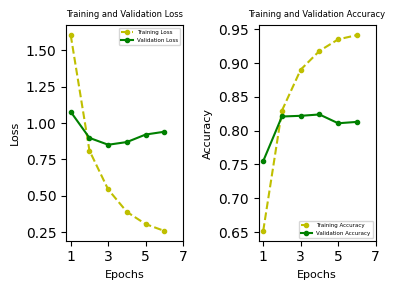



------------------------------------------------------------------------------------------------
Outputs:  64 Dropout:  0.3 LearningRate:  0.002 Batch:  512
Epoch:   0 | Loss: 1.8810e+00 | Accuracy: 5.9672e-01 | Validation loss: 1.1618e+00 | Validation accuracy: 7.4100e-01
Epoch:   1 | Loss: 9.6223e-01 | Accuracy: 8.0105e-01 | Validation loss: 9.6216e-01 | Validation accuracy: 7.8800e-01
Epoch:   2 | Loss: 6.6342e-01 | Accuracy: 8.6307e-01 | Validation loss: 8.7459e-01 | Validation accuracy: 8.1200e-01
Epoch:   3 | Loss: 5.0590e-01 | Accuracy: 8.9376e-01 | Validation loss: 8.3928e-01 | Validation accuracy: 8.2900e-01
Epoch:   4 | Loss: 3.7594e-01 | Accuracy: 9.2258e-01 | Validation loss: 8.4707e-01 | Validation accuracy: 8.2600e-01
Epoch:   5 | Loss: 3.1164e-01 | Accuracy: 9.3272e-01 | Validation loss: 8.7175e-01 | Validation accuracy: 8.1700e-01



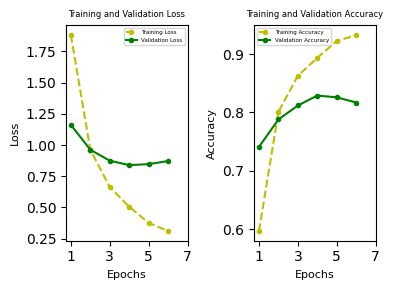



------------------------------------------------------------------------------------------------
Outputs:  64 Dropout:  0.3 LearningRate:  0.003 Batch:  256
Epoch:   0 | Loss: 1.5070e+00 | Accuracy: 6.6988e-01 | Validation loss: 9.9633e-01 | Validation accuracy: 7.8100e-01
Epoch:   1 | Loss: 7.1457e-01 | Accuracy: 8.4427e-01 | Validation loss: 8.7770e-01 | Validation accuracy: 8.1300e-01
Epoch:   2 | Loss: 4.7679e-01 | Accuracy: 8.9727e-01 | Validation loss: 8.7187e-01 | Validation accuracy: 8.1400e-01
Epoch:   3 | Loss: 3.5593e-01 | Accuracy: 9.2233e-01 | Validation loss: 8.8017e-01 | Validation accuracy: 8.1800e-01
Epoch:   4 | Loss: 2.9817e-01 | Accuracy: 9.3623e-01 | Validation loss: 1.0164e+00 | Validation accuracy: 7.8000e-01
Epoch:   5 | Loss: 2.4825e-01 | Accuracy: 9.4350e-01 | Validation loss: 1.0170e+00 | Validation accuracy: 8.0400e-01



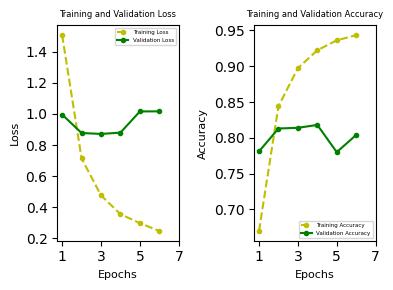



------------------------------------------------------------------------------------------------
Outputs:  64 Dropout:  0.3 LearningRate:  0.003 Batch:  512
Epoch:   0 | Loss: 1.7296e+00 | Accuracy: 6.1614e-01 | Validation loss: 1.1118e+00 | Validation accuracy: 7.4500e-01
Epoch:   1 | Loss: 8.1885e-01 | Accuracy: 8.2824e-01 | Validation loss: 9.4842e-01 | Validation accuracy: 7.9400e-01
Epoch:   2 | Loss: 5.6242e-01 | Accuracy: 8.7860e-01 | Validation loss: 8.3641e-01 | Validation accuracy: 8.2100e-01
Epoch:   3 | Loss: 4.1277e-01 | Accuracy: 9.1468e-01 | Validation loss: 8.6328e-01 | Validation accuracy: 8.1600e-01
Epoch:   4 | Loss: 3.2414e-01 | Accuracy: 9.2746e-01 | Validation loss: 8.9763e-01 | Validation accuracy: 8.1600e-01
Epoch:   5 | Loss: 2.7036e-01 | Accuracy: 9.3736e-01 | Validation loss: 9.4395e-01 | Validation accuracy: 8.0800e-01



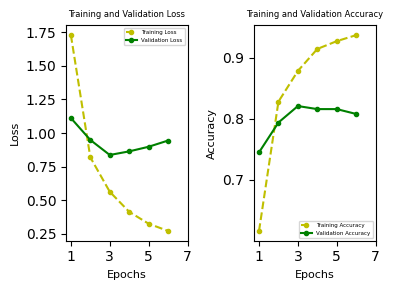



------------------------------------------------------------------------------------------------
Outputs:  64 Dropout:  0.4 LearningRate:  0.002 Batch:  256
Epoch:   0 | Loss: 1.6532e+00 | Accuracy: 6.3631e-01 | Validation loss: 1.0997e+00 | Validation accuracy: 7.6200e-01
Epoch:   1 | Loss: 8.9999e-01 | Accuracy: 8.0506e-01 | Validation loss: 9.3715e-01 | Validation accuracy: 8.0100e-01
Epoch:   2 | Loss: 6.5676e-01 | Accuracy: 8.5993e-01 | Validation loss: 9.3096e-01 | Validation accuracy: 8.0200e-01
Epoch:   3 | Loss: 4.9847e-01 | Accuracy: 8.8887e-01 | Validation loss: 9.2675e-01 | Validation accuracy: 8.1600e-01
Epoch:   4 | Loss: 3.9774e-01 | Accuracy: 9.1280e-01 | Validation loss: 9.0831e-01 | Validation accuracy: 8.2200e-01
Epoch:   5 | Loss: 3.3987e-01 | Accuracy: 9.2408e-01 | Validation loss: 9.6105e-01 | Validation accuracy: 8.1100e-01



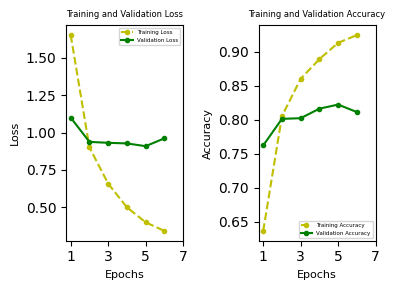



------------------------------------------------------------------------------------------------
Outputs:  64 Dropout:  0.4 LearningRate:  0.002 Batch:  512
Epoch:   0 | Loss: 1.9191e+00 | Accuracy: 5.8369e-01 | Validation loss: 1.1515e+00 | Validation accuracy: 7.2600e-01
Epoch:   1 | Loss: 1.0539e+00 | Accuracy: 7.7412e-01 | Validation loss: 9.9643e-01 | Validation accuracy: 7.8800e-01
Epoch:   2 | Loss: 7.9176e-01 | Accuracy: 8.2962e-01 | Validation loss: 9.1810e-01 | Validation accuracy: 8.0700e-01
Epoch:   3 | Loss: 6.0816e-01 | Accuracy: 8.7309e-01 | Validation loss: 8.5009e-01 | Validation accuracy: 8.2100e-01
Epoch:   4 | Loss: 4.8239e-01 | Accuracy: 8.9489e-01 | Validation loss: 8.7909e-01 | Validation accuracy: 8.2900e-01
Epoch:   5 | Loss: 4.0208e-01 | Accuracy: 9.1493e-01 | Validation loss: 8.8373e-01 | Validation accuracy: 8.1700e-01



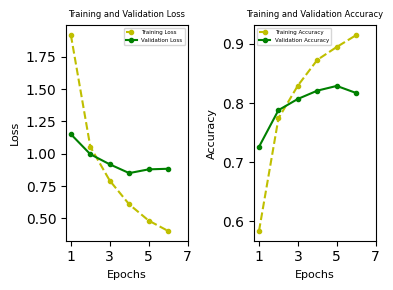



------------------------------------------------------------------------------------------------
Outputs:  64 Dropout:  0.4 LearningRate:  0.003 Batch:  256
Epoch:   0 | Loss: 1.5979e+00 | Accuracy: 6.5309e-01 | Validation loss: 1.0467e+00 | Validation accuracy: 7.6000e-01
Epoch:   1 | Loss: 8.2592e-01 | Accuracy: 8.2035e-01 | Validation loss: 9.8795e-01 | Validation accuracy: 7.9200e-01
Epoch:   2 | Loss: 5.8669e-01 | Accuracy: 8.7058e-01 | Validation loss: 8.7187e-01 | Validation accuracy: 8.2200e-01
Epoch:   3 | Loss: 4.5810e-01 | Accuracy: 8.9777e-01 | Validation loss: 8.4970e-01 | Validation accuracy: 8.2900e-01
Epoch:   4 | Loss: 3.7770e-01 | Accuracy: 9.1155e-01 | Validation loss: 9.0516e-01 | Validation accuracy: 8.1900e-01
Epoch:   5 | Loss: 3.2878e-01 | Accuracy: 9.2245e-01 | Validation loss: 9.6336e-01 | Validation accuracy: 8.1300e-01



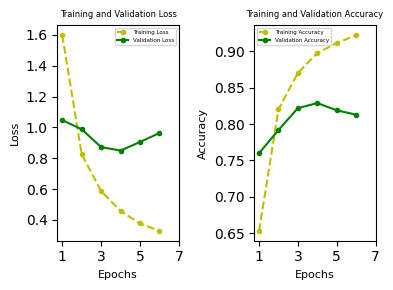



------------------------------------------------------------------------------------------------
Outputs:  64 Dropout:  0.4 LearningRate:  0.003 Batch:  512
Epoch:   0 | Loss: 1.8612e+00 | Accuracy: 5.9308e-01 | Validation loss: 1.0768e+00 | Validation accuracy: 7.6100e-01
Epoch:   1 | Loss: 9.3554e-01 | Accuracy: 7.9541e-01 | Validation loss: 8.9926e-01 | Validation accuracy: 8.2100e-01
Epoch:   2 | Loss: 6.7915e-01 | Accuracy: 8.5355e-01 | Validation loss: 8.6184e-01 | Validation accuracy: 8.1200e-01
Epoch:   3 | Loss: 5.1386e-01 | Accuracy: 8.8925e-01 | Validation loss: 8.6937e-01 | Validation accuracy: 8.1600e-01
Epoch:   4 | Loss: 4.2120e-01 | Accuracy: 9.0829e-01 | Validation loss: 8.3269e-01 | Validation accuracy: 8.2600e-01
Epoch:   5 | Loss: 3.5858e-01 | Accuracy: 9.2095e-01 | Validation loss: 8.8319e-01 | Validation accuracy: 8.2100e-01



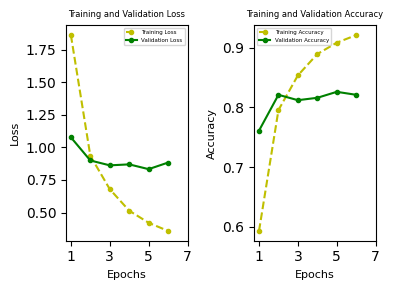



------------------------------------------------------------------------------------------------
Outputs:  96 Dropout:  0.3 LearningRate:  0.002 Batch:  256
Epoch:   0 | Loss: 1.4530e+00 | Accuracy: 6.8091e-01 | Validation loss: 9.2587e-01 | Validation accuracy: 7.9600e-01
Epoch:   1 | Loss: 6.6867e-01 | Accuracy: 8.5467e-01 | Validation loss: 8.6128e-01 | Validation accuracy: 8.1100e-01
Epoch:   2 | Loss: 4.3000e-01 | Accuracy: 9.1280e-01 | Validation loss: 8.4944e-01 | Validation accuracy: 8.2400e-01
Epoch:   3 | Loss: 3.1525e-01 | Accuracy: 9.3084e-01 | Validation loss: 1.1091e+00 | Validation accuracy: 7.5100e-01
Epoch:   4 | Loss: 2.6509e-01 | Accuracy: 9.3874e-01 | Validation loss: 8.9562e-01 | Validation accuracy: 8.1500e-01
Epoch:   5 | Loss: 2.2922e-01 | Accuracy: 9.4788e-01 | Validation loss: 9.1508e-01 | Validation accuracy: 8.2700e-01



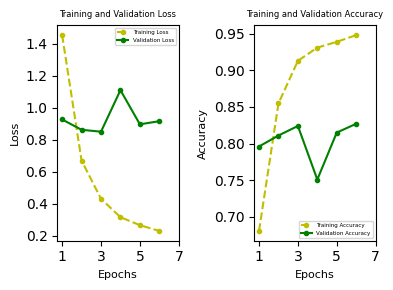



------------------------------------------------------------------------------------------------
Outputs:  96 Dropout:  0.3 LearningRate:  0.002 Batch:  512
Epoch:   0 | Loss: 1.7255e+00 | Accuracy: 6.1438e-01 | Validation loss: 1.0241e+00 | Validation accuracy: 7.8000e-01
Epoch:   1 | Loss: 8.0490e-01 | Accuracy: 8.2786e-01 | Validation loss: 8.5674e-01 | Validation accuracy: 8.2500e-01
Epoch:   2 | Loss: 5.3001e-01 | Accuracy: 8.8875e-01 | Validation loss: 8.3630e-01 | Validation accuracy: 8.2300e-01
Epoch:   3 | Loss: 3.7121e-01 | Accuracy: 9.1919e-01 | Validation loss: 8.8696e-01 | Validation accuracy: 8.0900e-01
Epoch:   4 | Loss: 2.9717e-01 | Accuracy: 9.3460e-01 | Validation loss: 8.5354e-01 | Validation accuracy: 8.2300e-01
Epoch:   5 | Loss: 2.4968e-01 | Accuracy: 9.4287e-01 | Validation loss: 8.8544e-01 | Validation accuracy: 8.2200e-01



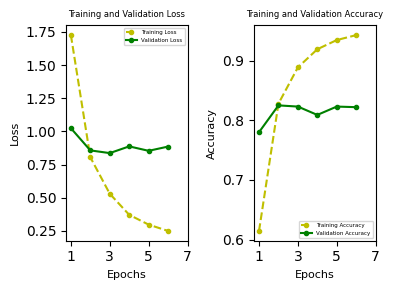



------------------------------------------------------------------------------------------------
Outputs:  96 Dropout:  0.3 LearningRate:  0.003 Batch:  256
Epoch:   0 | Loss: 1.4182e+00 | Accuracy: 6.8680e-01 | Validation loss: 9.4927e-01 | Validation accuracy: 7.9800e-01
Epoch:   1 | Loss: 6.0261e-01 | Accuracy: 8.6369e-01 | Validation loss: 8.3504e-01 | Validation accuracy: 8.1700e-01
Epoch:   2 | Loss: 3.9413e-01 | Accuracy: 9.1481e-01 | Validation loss: 8.3730e-01 | Validation accuracy: 8.1600e-01
Epoch:   3 | Loss: 3.0149e-01 | Accuracy: 9.3222e-01 | Validation loss: 1.0529e+00 | Validation accuracy: 7.8200e-01
Epoch:   4 | Loss: 2.5488e-01 | Accuracy: 9.4124e-01 | Validation loss: 9.8756e-01 | Validation accuracy: 8.0500e-01
Epoch:   5 | Loss: 2.3468e-01 | Accuracy: 9.4525e-01 | Validation loss: 9.6113e-01 | Validation accuracy: 8.1000e-01



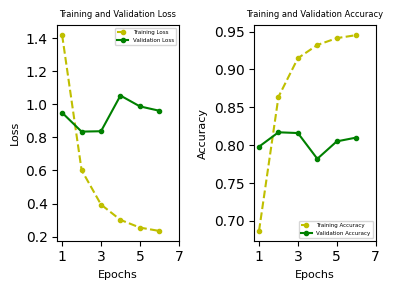



------------------------------------------------------------------------------------------------
Outputs:  96 Dropout:  0.3 LearningRate:  0.003 Batch:  512
Epoch:   0 | Loss: 1.7876e+00 | Accuracy: 6.0624e-01 | Validation loss: 9.7697e-01 | Validation accuracy: 7.9700e-01
Epoch:   1 | Loss: 7.3914e-01 | Accuracy: 8.4052e-01 | Validation loss: 8.0281e-01 | Validation accuracy: 8.2700e-01
Epoch:   2 | Loss: 4.9854e-01 | Accuracy: 8.9151e-01 | Validation loss: 8.5665e-01 | Validation accuracy: 8.2500e-01
Epoch:   3 | Loss: 3.3622e-01 | Accuracy: 9.2621e-01 | Validation loss: 9.0918e-01 | Validation accuracy: 8.1100e-01
Epoch:   4 | Loss: 2.7344e-01 | Accuracy: 9.3874e-01 | Validation loss: 8.8246e-01 | Validation accuracy: 8.2600e-01
Epoch:   5 | Loss: 2.3375e-01 | Accuracy: 9.4625e-01 | Validation loss: 9.5240e-01 | Validation accuracy: 8.1600e-01



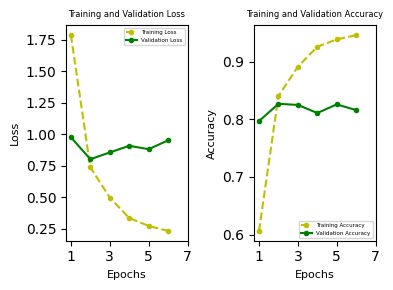



------------------------------------------------------------------------------------------------
Outputs:  96 Dropout:  0.4 LearningRate:  0.002 Batch:  256
Epoch:   0 | Loss: 1.5569e+00 | Accuracy: 6.5485e-01 | Validation loss: 1.0239e+00 | Validation accuracy: 7.7000e-01
Epoch:   1 | Loss: 7.7032e-01 | Accuracy: 8.3300e-01 | Validation loss: 8.9557e-01 | Validation accuracy: 8.0100e-01
Epoch:   2 | Loss: 5.3216e-01 | Accuracy: 8.8812e-01 | Validation loss: 8.5391e-01 | Validation accuracy: 8.1800e-01
Epoch:   3 | Loss: 3.8963e-01 | Accuracy: 9.1807e-01 | Validation loss: 8.7823e-01 | Validation accuracy: 8.1800e-01
Epoch:   4 | Loss: 3.1341e-01 | Accuracy: 9.3160e-01 | Validation loss: 9.3682e-01 | Validation accuracy: 8.2400e-01
Epoch:   5 | Loss: 2.6777e-01 | Accuracy: 9.4062e-01 | Validation loss: 9.7169e-01 | Validation accuracy: 8.1300e-01



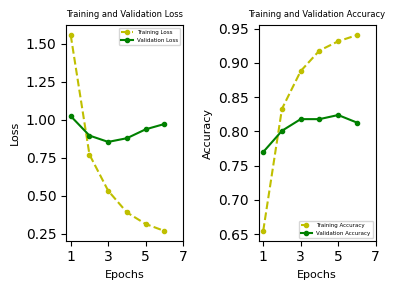



------------------------------------------------------------------------------------------------
Outputs:  96 Dropout:  0.4 LearningRate:  0.002 Batch:  512
Epoch:   0 | Loss: 1.8180e+00 | Accuracy: 5.9822e-01 | Validation loss: 1.0512e+00 | Validation accuracy: 7.8600e-01
Epoch:   1 | Loss: 8.8699e-01 | Accuracy: 8.1158e-01 | Validation loss: 8.9145e-01 | Validation accuracy: 8.0900e-01
Epoch:   2 | Loss: 6.3350e-01 | Accuracy: 8.6369e-01 | Validation loss: 8.6230e-01 | Validation accuracy: 8.0900e-01
Epoch:   3 | Loss: 4.7834e-01 | Accuracy: 8.9564e-01 | Validation loss: 8.2713e-01 | Validation accuracy: 8.3700e-01
Epoch:   4 | Loss: 3.5978e-01 | Accuracy: 9.1982e-01 | Validation loss: 8.4575e-01 | Validation accuracy: 8.2800e-01
Epoch:   5 | Loss: 3.0528e-01 | Accuracy: 9.3022e-01 | Validation loss: 8.8833e-01 | Validation accuracy: 8.3200e-01



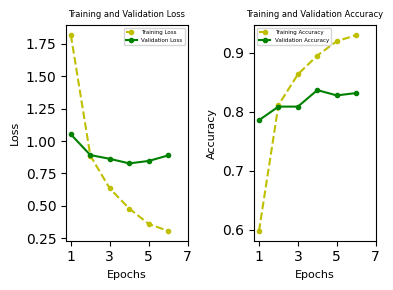



------------------------------------------------------------------------------------------------
Outputs:  96 Dropout:  0.4 LearningRate:  0.003 Batch:  256
Epoch:   0 | Loss: 1.5542e+00 | Accuracy: 6.5923e-01 | Validation loss: 9.2796e-01 | Validation accuracy: 7.8600e-01
Epoch:   1 | Loss: 7.0034e-01 | Accuracy: 8.4390e-01 | Validation loss: 9.0970e-01 | Validation accuracy: 8.1300e-01
Epoch:   2 | Loss: 4.8722e-01 | Accuracy: 8.9238e-01 | Validation loss: 8.2994e-01 | Validation accuracy: 8.2500e-01
Epoch:   3 | Loss: 3.6581e-01 | Accuracy: 9.1769e-01 | Validation loss: 9.9563e-01 | Validation accuracy: 7.9400e-01
Epoch:   4 | Loss: 3.0384e-01 | Accuracy: 9.3247e-01 | Validation loss: 9.4051e-01 | Validation accuracy: 8.2700e-01
Epoch:   5 | Loss: 2.7583e-01 | Accuracy: 9.3723e-01 | Validation loss: 9.8015e-01 | Validation accuracy: 8.1600e-01



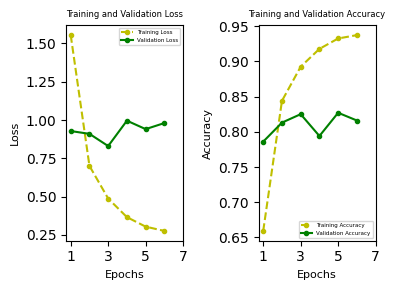



------------------------------------------------------------------------------------------------
Outputs:  96 Dropout:  0.4 LearningRate:  0.003 Batch:  512
Epoch:   0 | Loss: 1.8108e+00 | Accuracy: 6.0837e-01 | Validation loss: 9.9287e-01 | Validation accuracy: 7.8900e-01
Epoch:   1 | Loss: 8.3222e-01 | Accuracy: 8.2273e-01 | Validation loss: 8.5594e-01 | Validation accuracy: 8.2400e-01
Epoch:   2 | Loss: 5.5403e-01 | Accuracy: 8.7923e-01 | Validation loss: 9.9066e-01 | Validation accuracy: 7.8700e-01
Epoch:   3 | Loss: 4.2600e-01 | Accuracy: 9.0641e-01 | Validation loss: 8.1956e-01 | Validation accuracy: 8.3700e-01
Epoch:   4 | Loss: 3.2431e-01 | Accuracy: 9.2947e-01 | Validation loss: 1.0325e+00 | Validation accuracy: 7.8600e-01
Epoch:   5 | Loss: 2.8280e-01 | Accuracy: 9.3210e-01 | Validation loss: 9.2700e-01 | Validation accuracy: 8.2500e-01



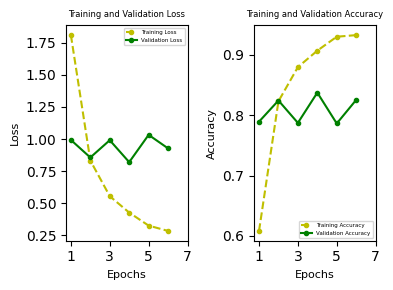



------------------------------------------------------------------------------------------------
Outputs:  128 Dropout:  0.3 LearningRate:  0.002 Batch:  256
Epoch:   0 | Loss: 1.4540e+00 | Accuracy: 6.7978e-01 | Validation loss: 9.0872e-01 | Validation accuracy: 7.9100e-01
Epoch:   1 | Loss: 6.1070e-01 | Accuracy: 8.6820e-01 | Validation loss: 8.6938e-01 | Validation accuracy: 8.0500e-01
Epoch:   2 | Loss: 3.8018e-01 | Accuracy: 9.1418e-01 | Validation loss: 8.5263e-01 | Validation accuracy: 8.1900e-01
Epoch:   3 | Loss: 2.8007e-01 | Accuracy: 9.3435e-01 | Validation loss: 9.5345e-01 | Validation accuracy: 8.0300e-01
Epoch:   4 | Loss: 2.3452e-01 | Accuracy: 9.4463e-01 | Validation loss: 9.1399e-01 | Validation accuracy: 8.1800e-01
Epoch:   5 | Loss: 2.1913e-01 | Accuracy: 9.4838e-01 | Validation loss: 1.0195e+00 | Validation accuracy: 8.0500e-01



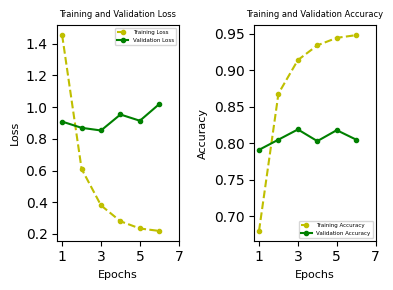



------------------------------------------------------------------------------------------------
Outputs:  128 Dropout:  0.3 LearningRate:  0.002 Batch:  512
Epoch:   0 | Loss: 1.7064e+00 | Accuracy: 6.3167e-01 | Validation loss: 9.8559e-01 | Validation accuracy: 7.9200e-01
Epoch:   1 | Loss: 7.3927e-01 | Accuracy: 8.4202e-01 | Validation loss: 8.2280e-01 | Validation accuracy: 8.2800e-01
Epoch:   2 | Loss: 4.6926e-01 | Accuracy: 9.0015e-01 | Validation loss: 8.3947e-01 | Validation accuracy: 8.2600e-01
Epoch:   3 | Loss: 3.4459e-01 | Accuracy: 9.2333e-01 | Validation loss: 8.6282e-01 | Validation accuracy: 8.1300e-01
Epoch:   4 | Loss: 2.5190e-01 | Accuracy: 9.4199e-01 | Validation loss: 8.3187e-01 | Validation accuracy: 8.3500e-01
Epoch:   5 | Loss: 2.2656e-01 | Accuracy: 9.4613e-01 | Validation loss: 9.2377e-01 | Validation accuracy: 8.0900e-01



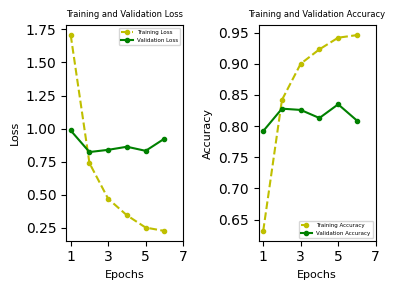



------------------------------------------------------------------------------------------------
Outputs:  128 Dropout:  0.3 LearningRate:  0.003 Batch:  256
Epoch:   0 | Loss: 1.4251e+00 | Accuracy: 6.8529e-01 | Validation loss: 8.8463e-01 | Validation accuracy: 8.0500e-01
Epoch:   1 | Loss: 5.5825e-01 | Accuracy: 8.7334e-01 | Validation loss: 8.8876e-01 | Validation accuracy: 8.0100e-01
Epoch:   2 | Loss: 3.6292e-01 | Accuracy: 9.2258e-01 | Validation loss: 9.1894e-01 | Validation accuracy: 8.1400e-01
Epoch:   3 | Loss: 2.9425e-01 | Accuracy: 9.3423e-01 | Validation loss: 1.0429e+00 | Validation accuracy: 7.8900e-01
Epoch:   4 | Loss: 2.6149e-01 | Accuracy: 9.3961e-01 | Validation loss: 1.0014e+00 | Validation accuracy: 8.1100e-01
Epoch:   5 | Loss: 2.2033e-01 | Accuracy: 9.4650e-01 | Validation loss: 1.0162e+00 | Validation accuracy: 8.0700e-01



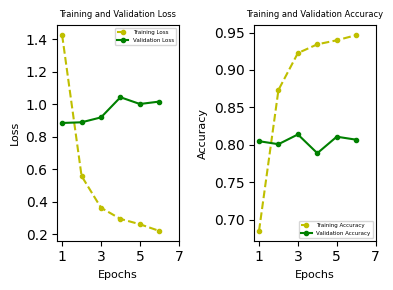



------------------------------------------------------------------------------------------------
Outputs:  128 Dropout:  0.3 LearningRate:  0.003 Batch:  512
Epoch:   0 | Loss: 1.8406e+00 | Accuracy: 6.0737e-01 | Validation loss: 9.3287e-01 | Validation accuracy: 7.9800e-01
Epoch:   1 | Loss: 6.9863e-01 | Accuracy: 8.4828e-01 | Validation loss: 9.2666e-01 | Validation accuracy: 8.0700e-01
Epoch:   2 | Loss: 4.1853e-01 | Accuracy: 9.0905e-01 | Validation loss: 7.9906e-01 | Validation accuracy: 8.3400e-01
Epoch:   3 | Loss: 3.1669e-01 | Accuracy: 9.3022e-01 | Validation loss: 8.9703e-01 | Validation accuracy: 8.2000e-01
Epoch:   4 | Loss: 2.7006e-01 | Accuracy: 9.3874e-01 | Validation loss: 8.8100e-01 | Validation accuracy: 8.2800e-01
Epoch:   5 | Loss: 2.2604e-01 | Accuracy: 9.4901e-01 | Validation loss: 9.7694e-01 | Validation accuracy: 8.0800e-01



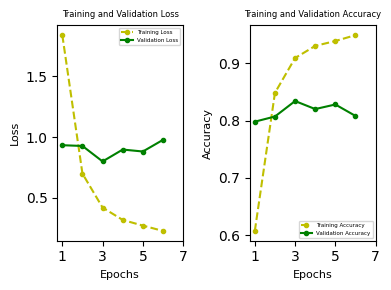



------------------------------------------------------------------------------------------------
Outputs:  128 Dropout:  0.4 LearningRate:  0.002 Batch:  256
Epoch:   0 | Loss: 1.4624e+00 | Accuracy: 6.8366e-01 | Validation loss: 9.0625e-01 | Validation accuracy: 8.0300e-01
Epoch:   1 | Loss: 6.7736e-01 | Accuracy: 8.5329e-01 | Validation loss: 8.1835e-01 | Validation accuracy: 8.3200e-01
Epoch:   2 | Loss: 4.5695e-01 | Accuracy: 9.0040e-01 | Validation loss: 8.6142e-01 | Validation accuracy: 8.1800e-01
Epoch:   3 | Loss: 3.2349e-01 | Accuracy: 9.2558e-01 | Validation loss: 8.5549e-01 | Validation accuracy: 8.2900e-01
Epoch:   4 | Loss: 2.7523e-01 | Accuracy: 9.3849e-01 | Validation loss: 9.3849e-01 | Validation accuracy: 8.1600e-01
Epoch:   5 | Loss: 2.4147e-01 | Accuracy: 9.4012e-01 | Validation loss: 9.3582e-01 | Validation accuracy: 8.1800e-01



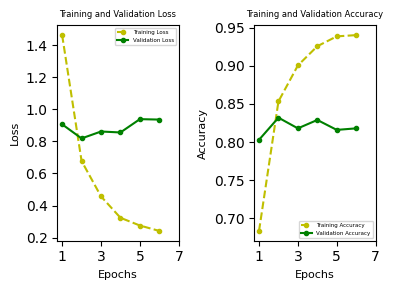



------------------------------------------------------------------------------------------------
Outputs:  128 Dropout:  0.4 LearningRate:  0.002 Batch:  512
Epoch:   0 | Loss: 1.7523e+00 | Accuracy: 6.1188e-01 | Validation loss: 9.9692e-01 | Validation accuracy: 7.9000e-01
Epoch:   1 | Loss: 8.2492e-01 | Accuracy: 8.2248e-01 | Validation loss: 8.2671e-01 | Validation accuracy: 8.2000e-01
Epoch:   2 | Loss: 5.4427e-01 | Accuracy: 8.8562e-01 | Validation loss: 8.0585e-01 | Validation accuracy: 8.3200e-01
Epoch:   3 | Loss: 4.0953e-01 | Accuracy: 9.1005e-01 | Validation loss: 8.2336e-01 | Validation accuracy: 8.2200e-01
Epoch:   4 | Loss: 3.0563e-01 | Accuracy: 9.3197e-01 | Validation loss: 8.2609e-01 | Validation accuracy: 8.3600e-01
Epoch:   5 | Loss: 2.6258e-01 | Accuracy: 9.3799e-01 | Validation loss: 9.2744e-01 | Validation accuracy: 8.1100e-01



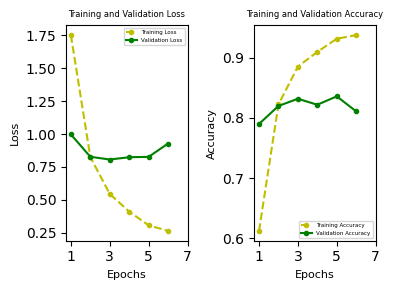



------------------------------------------------------------------------------------------------
Outputs:  128 Dropout:  0.4 LearningRate:  0.003 Batch:  256
Epoch:   0 | Loss: 1.5151e+00 | Accuracy: 6.7364e-01 | Validation loss: 9.5518e-01 | Validation accuracy: 7.8000e-01
Epoch:   1 | Loss: 6.7432e-01 | Accuracy: 8.4966e-01 | Validation loss: 9.1259e-01 | Validation accuracy: 7.9800e-01
Epoch:   2 | Loss: 4.3489e-01 | Accuracy: 9.0366e-01 | Validation loss: 8.8833e-01 | Validation accuracy: 8.1500e-01
Epoch:   3 | Loss: 3.2749e-01 | Accuracy: 9.2521e-01 | Validation loss: 9.6603e-01 | Validation accuracy: 8.0500e-01
Epoch:   4 | Loss: 2.8152e-01 | Accuracy: 9.3849e-01 | Validation loss: 9.5575e-01 | Validation accuracy: 8.2100e-01
Epoch:   5 | Loss: 2.6648e-01 | Accuracy: 9.3936e-01 | Validation loss: 9.8780e-01 | Validation accuracy: 8.0800e-01



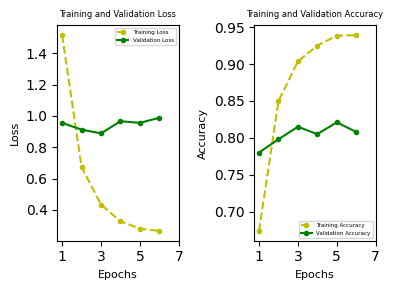



------------------------------------------------------------------------------------------------
Outputs:  128 Dropout:  0.4 LearningRate:  0.003 Batch:  512
Epoch:   0 | Loss: 1.7716e+00 | Accuracy: 6.1325e-01 | Validation loss: 9.4504e-01 | Validation accuracy: 8.0900e-01
Epoch:   1 | Loss: 7.3604e-01 | Accuracy: 8.3864e-01 | Validation loss: 8.8105e-01 | Validation accuracy: 8.1700e-01
Epoch:   2 | Loss: 4.9348e-01 | Accuracy: 8.9050e-01 | Validation loss: 8.1059e-01 | Validation accuracy: 8.3700e-01
Epoch:   3 | Loss: 3.4966e-01 | Accuracy: 9.2408e-01 | Validation loss: 9.8820e-01 | Validation accuracy: 8.0300e-01
Epoch:   4 | Loss: 3.0504e-01 | Accuracy: 9.2809e-01 | Validation loss: 8.8127e-01 | Validation accuracy: 8.2900e-01
Epoch:   5 | Loss: 2.5188e-01 | Accuracy: 9.4262e-01 | Validation loss: 1.0958e+00 | Validation accuracy: 7.9200e-01



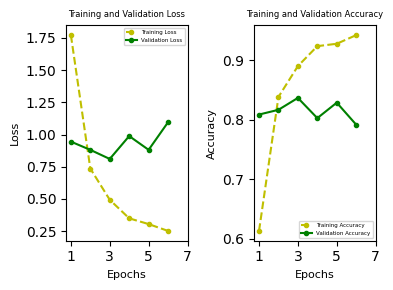



------------------------------------------------------------------------------------------------
Outputs:  512 Dropout:  0.3 LearningRate:  0.002 Batch:  256
Epoch:   0 | Loss: 1.8767e+00 | Accuracy: 6.7201e-01 | Validation loss: 9.8386e-01 | Validation accuracy: 8.0200e-01
Epoch:   1 | Loss: 5.5747e-01 | Accuracy: 8.7321e-01 | Validation loss: 1.3402e+00 | Validation accuracy: 7.7300e-01
Epoch:   2 | Loss: 4.0245e-01 | Accuracy: 9.1393e-01 | Validation loss: 1.0488e+00 | Validation accuracy: 8.1800e-01
Epoch:   3 | Loss: 3.2674e-01 | Accuracy: 9.3222e-01 | Validation loss: 1.3749e+00 | Validation accuracy: 7.5500e-01
Epoch:   4 | Loss: 2.8341e-01 | Accuracy: 9.3485e-01 | Validation loss: 1.0976e+00 | Validation accuracy: 8.0900e-01
Epoch:   5 | Loss: 2.6044e-01 | Accuracy: 9.4412e-01 | Validation loss: 1.2592e+00 | Validation accuracy: 7.7900e-01



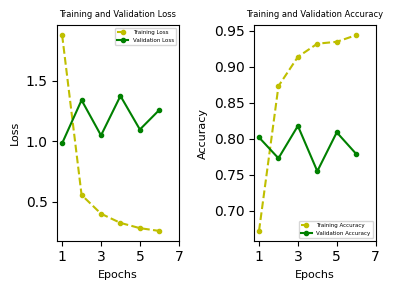



------------------------------------------------------------------------------------------------
Outputs:  512 Dropout:  0.3 LearningRate:  0.002 Batch:  512
Epoch:   0 | Loss: 3.0589e+00 | Accuracy: 5.7467e-01 | Validation loss: 1.0651e+00 | Validation accuracy: 7.7200e-01
Epoch:   1 | Loss: 6.4504e-01 | Accuracy: 8.6206e-01 | Validation loss: 9.6031e-01 | Validation accuracy: 8.0300e-01
Epoch:   2 | Loss: 4.0582e-01 | Accuracy: 9.0867e-01 | Validation loss: 1.0729e+00 | Validation accuracy: 7.9700e-01
Epoch:   3 | Loss: 4.1565e-01 | Accuracy: 9.0717e-01 | Validation loss: 9.2780e-01 | Validation accuracy: 8.1200e-01
Epoch:   4 | Loss: 2.9630e-01 | Accuracy: 9.3084e-01 | Validation loss: 1.1889e+00 | Validation accuracy: 7.9400e-01
Epoch:   5 | Loss: 2.8213e-01 | Accuracy: 9.3723e-01 | Validation loss: 1.0445e+00 | Validation accuracy: 8.0200e-01



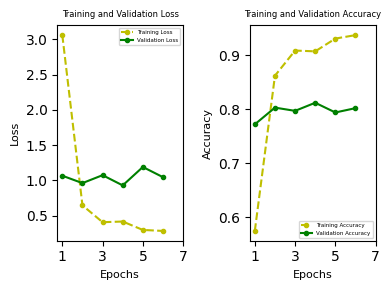



------------------------------------------------------------------------------------------------
Outputs:  512 Dropout:  0.3 LearningRate:  0.003 Batch:  256
Epoch:   0 | Loss: 3.0607e+00 | Accuracy: 6.4057e-01 | Validation loss: 1.3712e+00 | Validation accuracy: 6.8000e-01
Epoch:   1 | Loss: 6.4027e-01 | Accuracy: 8.6181e-01 | Validation loss: 2.0264e+00 | Validation accuracy: 6.3000e-01
Epoch:   2 | Loss: 5.6974e-01 | Accuracy: 8.8023e-01 | Validation loss: 1.4737e+00 | Validation accuracy: 7.7300e-01
Epoch:   3 | Loss: 3.7613e-01 | Accuracy: 9.1994e-01 | Validation loss: 1.7762e+00 | Validation accuracy: 6.6600e-01
Epoch:   4 | Loss: 3.5054e-01 | Accuracy: 9.2471e-01 | Validation loss: 1.3046e+00 | Validation accuracy: 7.9300e-01
Epoch:   5 | Loss: 3.0930e-01 | Accuracy: 9.3373e-01 | Validation loss: 1.4950e+00 | Validation accuracy: 7.5800e-01



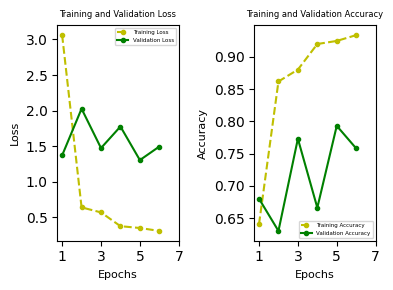



------------------------------------------------------------------------------------------------
Outputs:  512 Dropout:  0.3 LearningRate:  0.003 Batch:  512
Epoch:   0 | Loss: 5.2979e+00 | Accuracy: 5.2631e-01 | Validation loss: 1.0581e+00 | Validation accuracy: 7.9400e-01
Epoch:   1 | Loss: 7.3903e-01 | Accuracy: 8.4904e-01 | Validation loss: 9.3403e-01 | Validation accuracy: 8.0600e-01
Epoch:   2 | Loss: 7.7559e-01 | Accuracy: 8.5743e-01 | Validation loss: 1.1699e+00 | Validation accuracy: 7.8900e-01
Epoch:   3 | Loss: 3.8995e-01 | Accuracy: 9.1644e-01 | Validation loss: 2.5029e+00 | Validation accuracy: 6.2300e-01
Epoch:   4 | Loss: 4.8246e-01 | Accuracy: 9.0366e-01 | Validation loss: 1.0536e+00 | Validation accuracy: 7.9300e-01
Epoch:   5 | Loss: 5.6900e-01 | Accuracy: 8.8524e-01 | Validation loss: 1.1172e+00 | Validation accuracy: 8.2900e-01



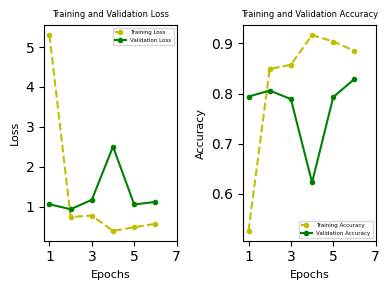



------------------------------------------------------------------------------------------------
Outputs:  512 Dropout:  0.4 LearningRate:  0.002 Batch:  256
Epoch:   0 | Loss: 1.9549e+00 | Accuracy: 6.6399e-01 | Validation loss: 8.5613e-01 | Validation accuracy: 8.2500e-01
Epoch:   1 | Loss: 5.9938e-01 | Accuracy: 8.6783e-01 | Validation loss: 1.3389e+00 | Validation accuracy: 7.2100e-01
Epoch:   2 | Loss: 4.2000e-01 | Accuracy: 9.0641e-01 | Validation loss: 1.0370e+00 | Validation accuracy: 7.9300e-01
Epoch:   3 | Loss: 3.4638e-01 | Accuracy: 9.2245e-01 | Validation loss: 9.9268e-01 | Validation accuracy: 8.1900e-01
Epoch:   4 | Loss: 2.9146e-01 | Accuracy: 9.3623e-01 | Validation loss: 1.1062e+00 | Validation accuracy: 8.0900e-01
Epoch:   5 | Loss: 2.7691e-01 | Accuracy: 9.3861e-01 | Validation loss: 1.3130e+00 | Validation accuracy: 7.9400e-01



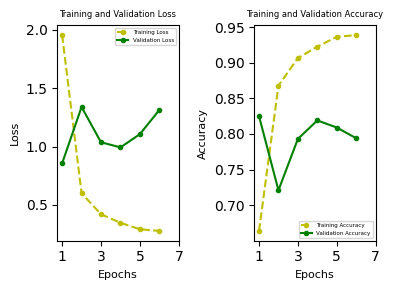



------------------------------------------------------------------------------------------------
Outputs:  512 Dropout:  0.4 LearningRate:  0.002 Batch:  512
Epoch:   0 | Loss: 2.9089e+00 | Accuracy: 5.6502e-01 | Validation loss: 1.0103e+00 | Validation accuracy: 7.9500e-01
Epoch:   1 | Loss: 6.9617e-01 | Accuracy: 8.5329e-01 | Validation loss: 8.1401e-01 | Validation accuracy: 8.2500e-01
Epoch:   2 | Loss: 4.5948e-01 | Accuracy: 8.9602e-01 | Validation loss: 1.7591e+00 | Validation accuracy: 7.1900e-01
Epoch:   3 | Loss: 4.0768e-01 | Accuracy: 9.1431e-01 | Validation loss: 1.0532e+00 | Validation accuracy: 8.0300e-01
Epoch:   4 | Loss: 3.0358e-01 | Accuracy: 9.3034e-01 | Validation loss: 1.0005e+00 | Validation accuracy: 8.1500e-01
Epoch:   5 | Loss: 3.1196e-01 | Accuracy: 9.3034e-01 | Validation loss: 9.8901e-01 | Validation accuracy: 8.2000e-01



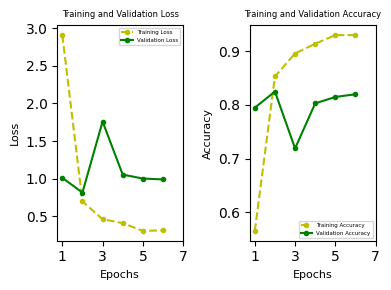



------------------------------------------------------------------------------------------------
Outputs:  512 Dropout:  0.4 LearningRate:  0.003 Batch:  256
Epoch:   0 | Loss: 2.9037e+00 | Accuracy: 6.4545e-01 | Validation loss: 1.2802e+00 | Validation accuracy: 7.5200e-01
Epoch:   1 | Loss: 6.7113e-01 | Accuracy: 8.5292e-01 | Validation loss: 1.2859e+00 | Validation accuracy: 7.6900e-01
Epoch:   2 | Loss: 5.2193e-01 | Accuracy: 8.8762e-01 | Validation loss: 1.2950e+00 | Validation accuracy: 7.7700e-01
Epoch:   3 | Loss: 4.0020e-01 | Accuracy: 9.1518e-01 | Validation loss: 1.5661e+00 | Validation accuracy: 7.5600e-01
Epoch:   4 | Loss: 3.7236e-01 | Accuracy: 9.2107e-01 | Validation loss: 1.3606e+00 | Validation accuracy: 7.8000e-01
Epoch:   5 | Loss: 3.1977e-01 | Accuracy: 9.3072e-01 | Validation loss: 1.2598e+00 | Validation accuracy: 7.8200e-01



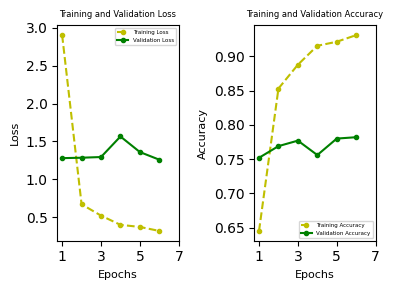



------------------------------------------------------------------------------------------------
Outputs:  512 Dropout:  0.4 LearningRate:  0.003 Batch:  512
Epoch:   0 | Loss: 4.8220e+00 | Accuracy: 5.3658e-01 | Validation loss: 1.0666e+00 | Validation accuracy: 7.8600e-01
Epoch:   1 | Loss: 7.2198e-01 | Accuracy: 8.4828e-01 | Validation loss: 9.0068e-01 | Validation accuracy: 8.1200e-01
Epoch:   2 | Loss: 6.2012e-01 | Accuracy: 8.6783e-01 | Validation loss: 2.7450e+00 | Validation accuracy: 6.4500e-01
Epoch:   3 | Loss: 6.8635e-01 | Accuracy: 8.8136e-01 | Validation loss: 1.0140e+00 | Validation accuracy: 8.1400e-01
Epoch:   4 | Loss: 4.4450e-01 | Accuracy: 9.0441e-01 | Validation loss: 1.2132e+00 | Validation accuracy: 8.1600e-01
Epoch:   5 | Loss: 2.7351e-01 | Accuracy: 9.4137e-01 | Validation loss: 1.2323e+00 | Validation accuracy: 7.8700e-01



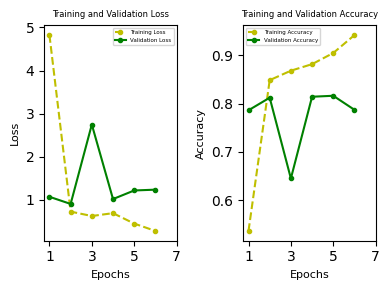



------------------------------------------------------------------------------------------------


In [54]:
# the following code is used to increase the output cell height, and it was found on Stack Overflow
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 20000})'''))

for valA in range(len(outputsCombined)):
  for valB in range(len(dropoutsCombined)):
    for valC in range(len(lRateCombined)):
      for valD in range(len(batchCombined)):
          print("Outputs: ", outputsCombined[valA], "Dropout: ", dropoutsCombined[valB], "LearningRate: ", lRateCombined[valC], "Batch: ", batchCombined[valD])
          modelFinal = keras.Sequential([
            layers.Dense(outputsCombined[valA], activation = "selu"),
            layers.Dropout(dropoutsCombined[valB]),
            layers.Dense(outputsCombined[valA], activation = "selu"),
            layers.Dropout(dropoutsCombined[valB]),
            layers.Dense(46, activation = "softmax")
            ])
          modelFinal.compile(optimizer = keras.optimizers.RMSprop(lRateCombined[valC]), loss = 'categorical_crossentropy', metrics = ['accuracy'])

          historyFinal = modelTrainFinal(modelFinal, batchCombined[valD])
          print()

          lossFinal = historyFinal.history["loss"]
          accFinal = historyFinal.history["accuracy"]
          valLossFinal = historyFinal.history["val_loss"]
          valAccFinal = historyFinal.history["val_accuracy"]
          epochs = range(1, len(lossFinal) + 1)

          #plotTitle = str(activation1[x]) + ", Softmax" +  ", RMSprop"
          #batchSize = str(batchSizing[x])
          plotFinal()
          print()
          gc.collect()
          print()
          print("------------------------------------------------------------------------------------------------")

Based on a visual inspection of the outputs, focused on validation accuracy, the training stages that generated results above 80% and specifically validation accuracy results of 82 - 83%, included paraters as follows:

- 64, 96 and 128 output units
- dropout rates of 0.3 and 0.4
- learning rates of 0.002
- batch size of 512

The final training will focus on comparing optimizers, such as:

- Adadelta (adaptive delta): delta refers to the difference between the current weight and the newly updated weight, and Adadelta removed the use of the learning rate parameter completely and replaced it with an exponential moving average of squared deltas
- Adam (adaptive moment estimation), whereby Adam utilizes the concept of momentum by adding fractions of previous gradients to the current one
- NAdam: an update Adam using Nesterov momentum

The training will compare RMSprop with Adadelta and NAdam.

In [55]:
outputsFinal = [64, 96, 128]
dropoutsFinal = [0.3, 0.4]
lRateFinal = [0.002]
batchFinal = [256]
optimizersFinal = ["RMSprop", "Adadelta", "Nadam"]

In [56]:
def modelOptFinal(model):

  '''
  Train the model, using training data and training labels.
  Epochs and batch size defined when function is called.
  Validation data and validation labels then used to validate the model.
  Callback defined to print outputs every 20 epochs.
  '''

  return model.fit(partialXtrain, partialYtrain, epochs = 6, batch_size = 256, validation_data = (xVal, yVal), verbose = 0, callbacks=[EpochOutput(interval = 1)])

def plotOptFinal():

  '''
  Create two vertical plots showing the training and validation loss and accuracy.
  A super title details the loss versus accuracy results, and the title shows the batch size.
  '''

  plt.figure(figsize = (6, 3))
  plt.subplot(1, 2, 1)
  plt.plot(range(1, len(lossOptFinal) + 1), lossOptFinal, "y.--", label = "Training Loss")
  plt.plot(range(1, len(lossOptFinal) + 1), valLossOptFinal, "g.-", label = "Validation Loss")
  plt.title("Training and Validation Loss", fontsize = 6)
  plt.xlabel("Epochs", fontsize = 8)
  plt.xticks(np.arange(1, len(lossOptFinal) + 2, 2))
  plt.ylabel("Loss", fontsize = 8)
  plt.legend(fontsize = 4)
  plt.tight_layout()

  plt.subplot(1, 2, 2)
  plt.plot(range(1, len(lossOptFinal) + 1), accOptFinal, "y.--", label = "Training Accuracy")
  plt.plot(range(1, len(lossOptFinal) + 1), valAccOptFinal, "g.-", label = "Validation Accuracy")
  plt.title("Training and Validation Accuracy", fontsize = 6)
  plt.xlabel("Epochs", fontsize = 8)
  plt.xticks(np.arange(1, len(lossOptFinal) + 2, 2))
  plt.ylabel("Accuracy", fontsize = 8)
  plt.legend(fontsize = 4)

  plt.tight_layout()
  plt.show()

<IPython.core.display.Javascript object>

Outputs:  64 Dropout:  0.3 LearningRate:  0.002
RMSprop
Epoch:   0 | Loss: 1.5821e+00 | Accuracy: 6.5873e-01 | Validation loss: 1.1011e+00 | Validation accuracy: 7.6800e-01
Epoch:   1 | Loss: 7.8737e-01 | Accuracy: 8.3175e-01 | Validation loss: 8.8848e-01 | Validation accuracy: 8.1700e-01
Epoch:   2 | Loss: 5.2807e-01 | Accuracy: 8.9013e-01 | Validation loss: 8.7446e-01 | Validation accuracy: 8.2500e-01
Epoch:   3 | Loss: 3.9034e-01 | Accuracy: 9.1506e-01 | Validation loss: 8.6644e-01 | Validation accuracy: 8.1500e-01
Epoch:   4 | Loss: 3.0446e-01 | Accuracy: 9.3022e-01 | Validation loss: 9.5160e-01 | Validation accuracy: 8.0300e-01
Epoch:   5 | Loss: 2.5646e-01 | Accuracy: 9.4275e-01 | Validation loss: 9.8427e-01 | Validation accuracy: 8.0400e-01



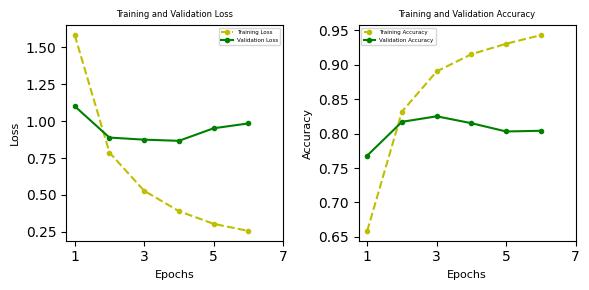



------------------------------------------------------------------------------------------------
Outputs:  64 Dropout:  0.3 LearningRate:  0.002
Adadelta
Epoch:   0 | Loss: 3.8574e+00 | Accuracy: 1.6662e-02 | Validation loss: 3.8289e+00 | Validation accuracy: 2.6000e-02
Epoch:   1 | Loss: 3.8365e+00 | Accuracy: 2.6685e-02 | Validation loss: 3.8066e+00 | Validation accuracy: 3.4000e-02
Epoch:   2 | Loss: 3.8131e+00 | Accuracy: 3.1822e-02 | Validation loss: 3.7843e+00 | Validation accuracy: 5.1000e-02
Epoch:   3 | Loss: 3.7920e+00 | Accuracy: 3.6081e-02 | Validation loss: 3.7622e+00 | Validation accuracy: 6.7000e-02
Epoch:   4 | Loss: 3.7739e+00 | Accuracy: 5.2243e-02 | Validation loss: 3.7402e+00 | Validation accuracy: 9.4000e-02
Epoch:   5 | Loss: 3.7495e+00 | Accuracy: 7.4543e-02 | Validation loss: 3.7183e+00 | Validation accuracy: 1.4000e-01



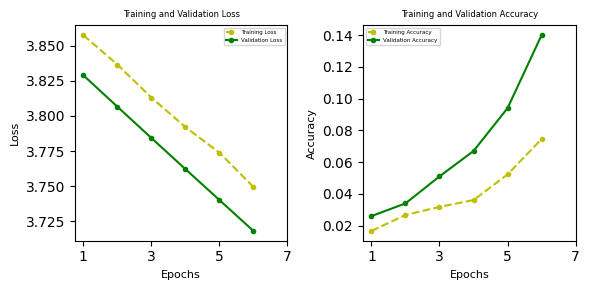



------------------------------------------------------------------------------------------------
Outputs:  64 Dropout:  0.3 LearningRate:  0.002
Nadam
Epoch:   0 | Loss: 1.9203e+00 | Accuracy: 6.0236e-01 | Validation loss: 1.0888e+00 | Validation accuracy: 7.6500e-01
Epoch:   1 | Loss: 8.5315e-01 | Accuracy: 8.2047e-01 | Validation loss: 8.7649e-01 | Validation accuracy: 8.1700e-01
Epoch:   2 | Loss: 5.3356e-01 | Accuracy: 8.8988e-01 | Validation loss: 8.4309e-01 | Validation accuracy: 8.1900e-01
Epoch:   3 | Loss: 3.6180e-01 | Accuracy: 9.2546e-01 | Validation loss: 8.3819e-01 | Validation accuracy: 8.2200e-01
Epoch:   4 | Loss: 2.8033e-01 | Accuracy: 9.4350e-01 | Validation loss: 8.8359e-01 | Validation accuracy: 8.1500e-01
Epoch:   5 | Loss: 2.4261e-01 | Accuracy: 9.4738e-01 | Validation loss: 9.2521e-01 | Validation accuracy: 8.0700e-01



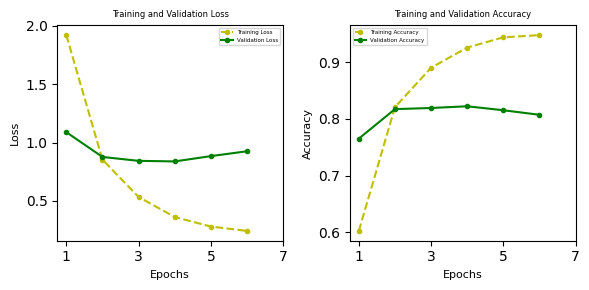



------------------------------------------------------------------------------------------------
Outputs:  64 Dropout:  0.4 LearningRate:  0.002
RMSprop
Epoch:   0 | Loss: 1.7065e+00 | Accuracy: 6.3267e-01 | Validation loss: 1.0814e+00 | Validation accuracy: 7.7800e-01
Epoch:   1 | Loss: 9.2417e-01 | Accuracy: 8.0080e-01 | Validation loss: 9.2958e-01 | Validation accuracy: 8.1200e-01
Epoch:   2 | Loss: 6.5455e-01 | Accuracy: 8.5956e-01 | Validation loss: 9.1482e-01 | Validation accuracy: 8.0400e-01
Epoch:   3 | Loss: 5.1994e-01 | Accuracy: 8.8549e-01 | Validation loss: 8.7826e-01 | Validation accuracy: 8.2000e-01
Epoch:   4 | Loss: 4.1869e-01 | Accuracy: 9.0867e-01 | Validation loss: 9.1673e-01 | Validation accuracy: 8.1500e-01
Epoch:   5 | Loss: 3.5668e-01 | Accuracy: 9.1982e-01 | Validation loss: 9.3277e-01 | Validation accuracy: 8.2900e-01



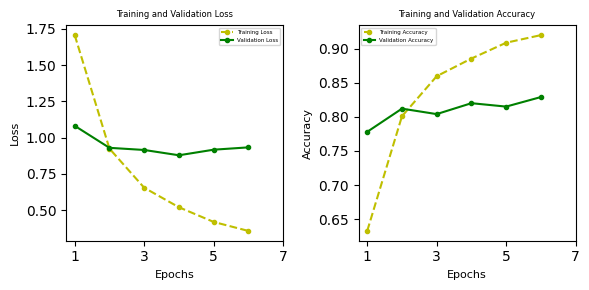



------------------------------------------------------------------------------------------------
Outputs:  64 Dropout:  0.4 LearningRate:  0.002
Adadelta
Epoch:   0 | Loss: 3.8456e+00 | Accuracy: 1.4282e-02 | Validation loss: 3.8171e+00 | Validation accuracy: 1.5000e-02
Epoch:   1 | Loss: 3.8240e+00 | Accuracy: 1.8792e-02 | Validation loss: 3.7977e+00 | Validation accuracy: 1.8000e-02
Epoch:   2 | Loss: 3.8031e+00 | Accuracy: 2.4681e-02 | Validation loss: 3.7786e+00 | Validation accuracy: 2.2000e-02
Epoch:   3 | Loss: 3.7854e+00 | Accuracy: 3.1947e-02 | Validation loss: 3.7597e+00 | Validation accuracy: 3.7000e-02
Epoch:   4 | Loss: 3.7609e+00 | Accuracy: 3.6332e-02 | Validation loss: 3.7411e+00 | Validation accuracy: 5.6000e-02
Epoch:   5 | Loss: 3.7459e+00 | Accuracy: 4.5978e-02 | Validation loss: 3.7227e+00 | Validation accuracy: 8.7000e-02



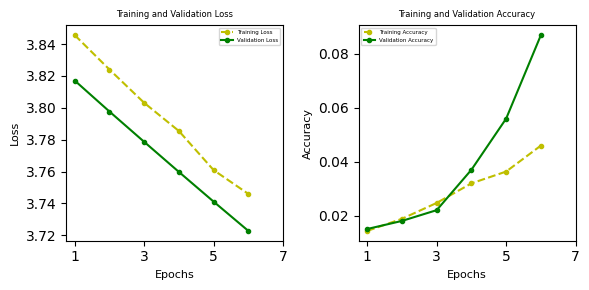



------------------------------------------------------------------------------------------------
Outputs:  64 Dropout:  0.4 LearningRate:  0.002
Nadam
Epoch:   0 | Loss: 2.0015e+00 | Accuracy: 5.8369e-01 | Validation loss: 1.1482e+00 | Validation accuracy: 7.5400e-01
Epoch:   1 | Loss: 9.6684e-01 | Accuracy: 7.9354e-01 | Validation loss: 9.2306e-01 | Validation accuracy: 8.0000e-01
Epoch:   2 | Loss: 6.4770e-01 | Accuracy: 8.6419e-01 | Validation loss: 8.5700e-01 | Validation accuracy: 8.2200e-01
Epoch:   3 | Loss: 4.5481e-01 | Accuracy: 9.0215e-01 | Validation loss: 8.7801e-01 | Validation accuracy: 8.1800e-01
Epoch:   4 | Loss: 3.6583e-01 | Accuracy: 9.1907e-01 | Validation loss: 9.1008e-01 | Validation accuracy: 8.0900e-01
Epoch:   5 | Loss: 3.0821e-01 | Accuracy: 9.3109e-01 | Validation loss: 9.5252e-01 | Validation accuracy: 8.1900e-01



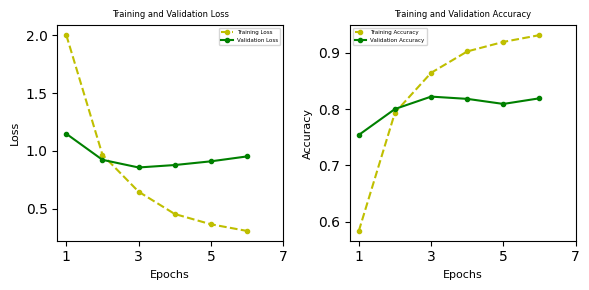



------------------------------------------------------------------------------------------------
Outputs:  96 Dropout:  0.3 LearningRate:  0.002
RMSprop
Epoch:   0 | Loss: 1.4793e+00 | Accuracy: 6.7314e-01 | Validation loss: 1.0011e+00 | Validation accuracy: 7.7900e-01
Epoch:   1 | Loss: 6.8382e-01 | Accuracy: 8.5505e-01 | Validation loss: 8.6857e-01 | Validation accuracy: 8.0700e-01
Epoch:   2 | Loss: 4.2898e-01 | Accuracy: 9.0679e-01 | Validation loss: 8.3789e-01 | Validation accuracy: 8.3400e-01
Epoch:   3 | Loss: 3.0943e-01 | Accuracy: 9.2922e-01 | Validation loss: 8.9143e-01 | Validation accuracy: 8.1200e-01
Epoch:   4 | Loss: 2.6213e-01 | Accuracy: 9.4112e-01 | Validation loss: 9.2177e-01 | Validation accuracy: 8.0400e-01
Epoch:   5 | Loss: 2.1922e-01 | Accuracy: 9.4638e-01 | Validation loss: 1.0160e+00 | Validation accuracy: 8.0500e-01



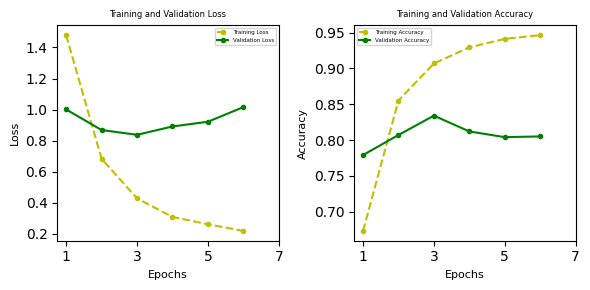



------------------------------------------------------------------------------------------------
Outputs:  96 Dropout:  0.3 LearningRate:  0.002
Adadelta
Epoch:   0 | Loss: 3.8597e+00 | Accuracy: 1.7665e-02 | Validation loss: 3.8326e+00 | Validation accuracy: 1.4000e-02
Epoch:   1 | Loss: 3.8251e+00 | Accuracy: 2.8815e-02 | Validation loss: 3.7999e+00 | Validation accuracy: 3.0000e-02
Epoch:   2 | Loss: 3.7925e+00 | Accuracy: 4.1969e-02 | Validation loss: 3.7672e+00 | Validation accuracy: 5.6000e-02
Epoch:   3 | Loss: 3.7617e+00 | Accuracy: 6.3643e-02 | Validation loss: 3.7345e+00 | Validation accuracy: 9.8000e-02
Epoch:   4 | Loss: 3.7290e+00 | Accuracy: 8.9827e-02 | Validation loss: 3.7014e+00 | Validation accuracy: 1.6900e-01
Epoch:   5 | Loss: 3.6960e+00 | Accuracy: 1.2428e-01 | Validation loss: 3.6686e+00 | Validation accuracy: 2.4700e-01



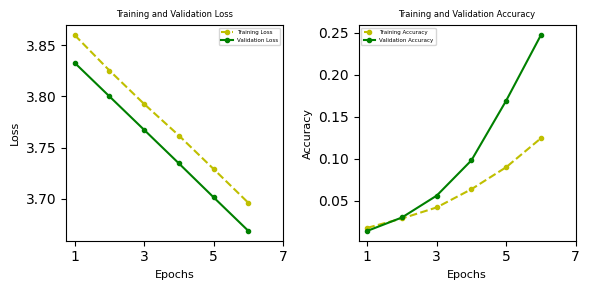



------------------------------------------------------------------------------------------------
Outputs:  96 Dropout:  0.3 LearningRate:  0.002
Nadam
Epoch:   0 | Loss: 1.6540e+00 | Accuracy: 6.5021e-01 | Validation loss: 9.7994e-01 | Validation accuracy: 8.0800e-01
Epoch:   1 | Loss: 6.6146e-01 | Accuracy: 8.6319e-01 | Validation loss: 7.9877e-01 | Validation accuracy: 8.3200e-01
Epoch:   2 | Loss: 3.6202e-01 | Accuracy: 9.2370e-01 | Validation loss: 8.4191e-01 | Validation accuracy: 8.2900e-01
Epoch:   3 | Loss: 2.7103e-01 | Accuracy: 9.3974e-01 | Validation loss: 8.7019e-01 | Validation accuracy: 8.2300e-01
Epoch:   4 | Loss: 2.1349e-01 | Accuracy: 9.4901e-01 | Validation loss: 9.0211e-01 | Validation accuracy: 8.1400e-01
Epoch:   5 | Loss: 1.9873e-01 | Accuracy: 9.5427e-01 | Validation loss: 9.4406e-01 | Validation accuracy: 8.1000e-01



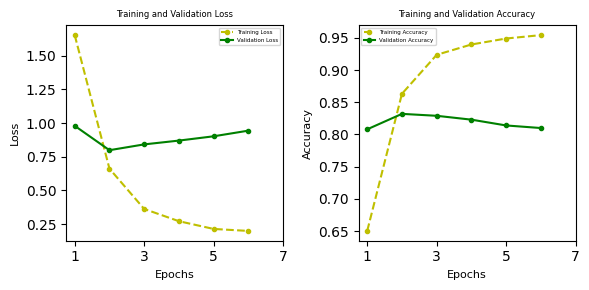



------------------------------------------------------------------------------------------------
Outputs:  96 Dropout:  0.4 LearningRate:  0.002
RMSprop
Epoch:   0 | Loss: 1.5351e+00 | Accuracy: 6.6186e-01 | Validation loss: 9.7701e-01 | Validation accuracy: 7.9400e-01
Epoch:   1 | Loss: 7.7616e-01 | Accuracy: 8.3137e-01 | Validation loss: 8.6961e-01 | Validation accuracy: 8.2800e-01
Epoch:   2 | Loss: 5.1886e-01 | Accuracy: 8.8887e-01 | Validation loss: 8.7340e-01 | Validation accuracy: 8.3400e-01
Epoch:   3 | Loss: 3.8788e-01 | Accuracy: 9.1318e-01 | Validation loss: 9.1453e-01 | Validation accuracy: 8.1200e-01
Epoch:   4 | Loss: 3.1137e-01 | Accuracy: 9.3348e-01 | Validation loss: 1.0009e+00 | Validation accuracy: 8.0500e-01
Epoch:   5 | Loss: 2.7702e-01 | Accuracy: 9.3711e-01 | Validation loss: 9.5031e-01 | Validation accuracy: 8.0600e-01



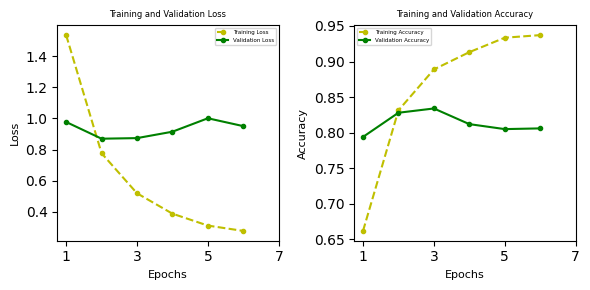



------------------------------------------------------------------------------------------------
Outputs:  96 Dropout:  0.4 LearningRate:  0.002
Adadelta
Epoch:   0 | Loss: 3.8283e+00 | Accuracy: 2.8815e-02 | Validation loss: 3.7858e+00 | Validation accuracy: 4.1000e-02
Epoch:   1 | Loss: 3.7983e+00 | Accuracy: 3.6206e-02 | Validation loss: 3.7570e+00 | Validation accuracy: 7.5000e-02
Epoch:   2 | Loss: 3.7729e+00 | Accuracy: 5.1366e-02 | Validation loss: 3.7285e+00 | Validation accuracy: 1.1100e-01
Epoch:   3 | Loss: 3.7479e+00 | Accuracy: 5.9885e-02 | Validation loss: 3.7003e+00 | Validation accuracy: 1.7900e-01
Epoch:   4 | Loss: 3.7164e+00 | Accuracy: 8.5192e-02 | Validation loss: 3.6723e+00 | Validation accuracy: 2.4200e-01
Epoch:   5 | Loss: 3.6854e+00 | Accuracy: 1.1125e-01 | Validation loss: 3.6443e+00 | Validation accuracy: 3.0100e-01



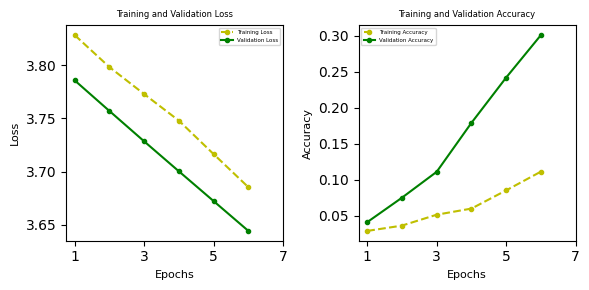



------------------------------------------------------------------------------------------------
Outputs:  96 Dropout:  0.4 LearningRate:  0.002
Nadam
Epoch:   0 | Loss: 1.7847e+00 | Accuracy: 6.1789e-01 | Validation loss: 1.0561e+00 | Validation accuracy: 7.9100e-01
Epoch:   1 | Loss: 7.8847e-01 | Accuracy: 8.3338e-01 | Validation loss: 8.7193e-01 | Validation accuracy: 8.1900e-01
Epoch:   2 | Loss: 4.9030e-01 | Accuracy: 8.9702e-01 | Validation loss: 8.4857e-01 | Validation accuracy: 8.2700e-01
Epoch:   3 | Loss: 3.4429e-01 | Accuracy: 9.2483e-01 | Validation loss: 8.9400e-01 | Validation accuracy: 8.2100e-01
Epoch:   4 | Loss: 2.7006e-01 | Accuracy: 9.4312e-01 | Validation loss: 9.3685e-01 | Validation accuracy: 8.1600e-01
Epoch:   5 | Loss: 2.5630e-01 | Accuracy: 9.4137e-01 | Validation loss: 9.6217e-01 | Validation accuracy: 8.1600e-01



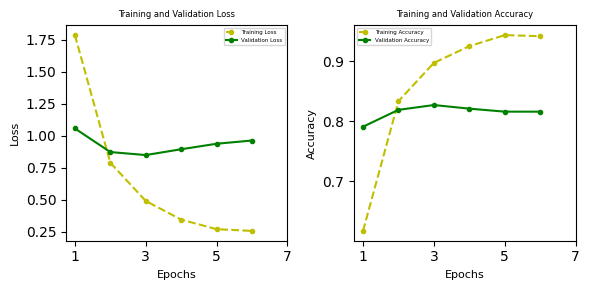



------------------------------------------------------------------------------------------------
Outputs:  128 Dropout:  0.3 LearningRate:  0.002
RMSprop
Epoch:   0 | Loss: 1.4400e+00 | Accuracy: 6.8241e-01 | Validation loss: 1.1021e+00 | Validation accuracy: 7.3500e-01
Epoch:   1 | Loss: 6.0908e-01 | Accuracy: 8.6833e-01 | Validation loss: 8.1500e-01 | Validation accuracy: 8.2900e-01
Epoch:   2 | Loss: 3.7924e-01 | Accuracy: 9.1969e-01 | Validation loss: 8.3958e-01 | Validation accuracy: 8.2300e-01
Epoch:   3 | Loss: 2.7294e-01 | Accuracy: 9.3899e-01 | Validation loss: 8.7249e-01 | Validation accuracy: 8.2600e-01
Epoch:   4 | Loss: 2.3610e-01 | Accuracy: 9.4575e-01 | Validation loss: 9.3549e-01 | Validation accuracy: 8.1200e-01
Epoch:   5 | Loss: 2.3075e-01 | Accuracy: 9.4701e-01 | Validation loss: 9.9575e-01 | Validation accuracy: 8.0200e-01



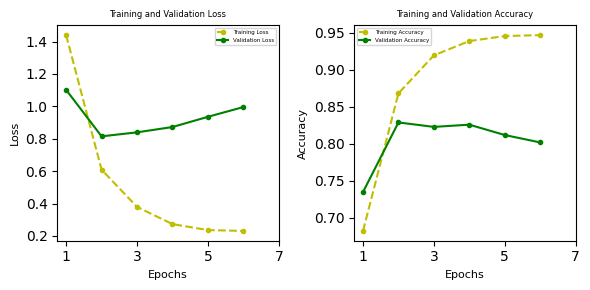



------------------------------------------------------------------------------------------------
Outputs:  128 Dropout:  0.3 LearningRate:  0.002
Adadelta
Epoch:   0 | Loss: 3.8094e+00 | Accuracy: 3.5831e-02 | Validation loss: 3.7887e+00 | Validation accuracy: 5.3000e-02
Epoch:   1 | Loss: 3.7743e+00 | Accuracy: 5.0238e-02 | Validation loss: 3.7534e+00 | Validation accuracy: 1.0000e-01
Epoch:   2 | Loss: 3.7433e+00 | Accuracy: 7.6798e-02 | Validation loss: 3.7181e+00 | Validation accuracy: 1.7400e-01
Epoch:   3 | Loss: 3.7054e+00 | Accuracy: 1.1463e-01 | Validation loss: 3.6819e+00 | Validation accuracy: 2.4500e-01
Epoch:   4 | Loss: 3.6685e+00 | Accuracy: 1.6061e-01 | Validation loss: 3.6459e+00 | Validation accuracy: 3.0300e-01
Epoch:   5 | Loss: 3.6341e+00 | Accuracy: 2.0834e-01 | Validation loss: 3.6097e+00 | Validation accuracy: 3.5600e-01



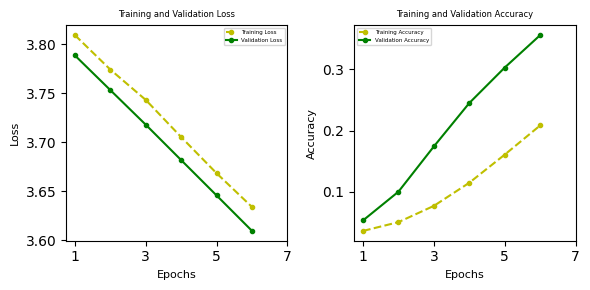



------------------------------------------------------------------------------------------------
Outputs:  128 Dropout:  0.3 LearningRate:  0.002
Nadam
Epoch:   0 | Loss: 1.6060e+00 | Accuracy: 6.5973e-01 | Validation loss: 9.3566e-01 | Validation accuracy: 8.1100e-01
Epoch:   1 | Loss: 5.8282e-01 | Accuracy: 8.7810e-01 | Validation loss: 8.0279e-01 | Validation accuracy: 8.2400e-01
Epoch:   2 | Loss: 3.1642e-01 | Accuracy: 9.3373e-01 | Validation loss: 8.5134e-01 | Validation accuracy: 8.1900e-01
Epoch:   3 | Loss: 2.2657e-01 | Accuracy: 9.4851e-01 | Validation loss: 9.1315e-01 | Validation accuracy: 8.1500e-01
Epoch:   4 | Loss: 1.9952e-01 | Accuracy: 9.5164e-01 | Validation loss: 1.0102e+00 | Validation accuracy: 8.1300e-01
Epoch:   5 | Loss: 1.8661e-01 | Accuracy: 9.5440e-01 | Validation loss: 9.6541e-01 | Validation accuracy: 8.0900e-01



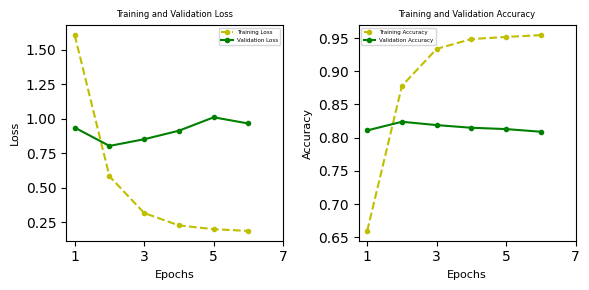



------------------------------------------------------------------------------------------------
Outputs:  128 Dropout:  0.4 LearningRate:  0.002
RMSprop
Epoch:   0 | Loss: 1.4762e+00 | Accuracy: 6.7439e-01 | Validation loss: 1.0465e+00 | Validation accuracy: 7.8000e-01
Epoch:   1 | Loss: 6.8981e-01 | Accuracy: 8.5442e-01 | Validation loss: 8.3718e-01 | Validation accuracy: 8.3100e-01
Epoch:   2 | Loss: 4.5334e-01 | Accuracy: 9.0103e-01 | Validation loss: 8.6559e-01 | Validation accuracy: 8.2300e-01
Epoch:   3 | Loss: 3.3811e-01 | Accuracy: 9.2696e-01 | Validation loss: 9.3670e-01 | Validation accuracy: 8.0800e-01
Epoch:   4 | Loss: 2.6161e-01 | Accuracy: 9.3999e-01 | Validation loss: 9.7839e-01 | Validation accuracy: 8.1500e-01
Epoch:   5 | Loss: 2.4400e-01 | Accuracy: 9.4475e-01 | Validation loss: 1.0182e+00 | Validation accuracy: 8.0900e-01



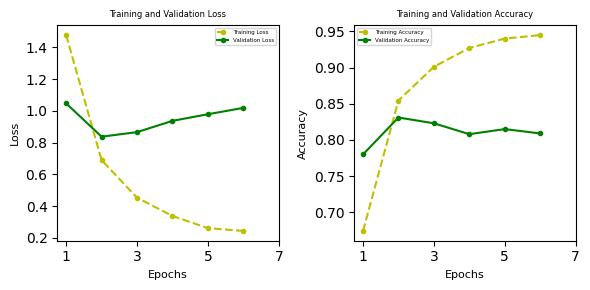



------------------------------------------------------------------------------------------------
Outputs:  128 Dropout:  0.4 LearningRate:  0.002
Adadelta
Epoch:   0 | Loss: 3.8868e+00 | Accuracy: 1.7790e-02 | Validation loss: 3.8472e+00 | Validation accuracy: 1.1000e-02
Epoch:   1 | Loss: 3.8509e+00 | Accuracy: 2.2050e-02 | Validation loss: 3.8089e+00 | Validation accuracy: 2.4000e-02
Epoch:   2 | Loss: 3.8115e+00 | Accuracy: 3.3951e-02 | Validation loss: 3.7712e+00 | Validation accuracy: 6.0000e-02
Epoch:   3 | Loss: 3.7802e+00 | Accuracy: 4.9361e-02 | Validation loss: 3.7338e+00 | Validation accuracy: 1.3100e-01
Epoch:   4 | Loss: 3.7398e+00 | Accuracy: 7.5169e-02 | Validation loss: 3.6967e+00 | Validation accuracy: 2.1700e-01
Epoch:   5 | Loss: 3.7090e+00 | Accuracy: 9.9850e-02 | Validation loss: 3.6599e+00 | Validation accuracy: 2.9100e-01



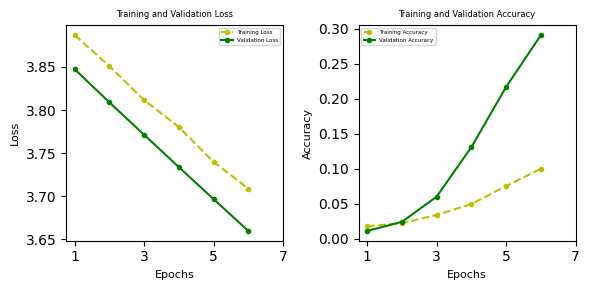



------------------------------------------------------------------------------------------------
Outputs:  128 Dropout:  0.4 LearningRate:  0.002
Nadam
Epoch:   0 | Loss: 1.6650e+00 | Accuracy: 6.4996e-01 | Validation loss: 9.5467e-01 | Validation accuracy: 8.0000e-01
Epoch:   1 | Loss: 6.8017e-01 | Accuracy: 8.5329e-01 | Validation loss: 8.1795e-01 | Validation accuracy: 8.3100e-01
Epoch:   2 | Loss: 3.9281e-01 | Accuracy: 9.1468e-01 | Validation loss: 8.4297e-01 | Validation accuracy: 8.2200e-01
Epoch:   3 | Loss: 2.7995e-01 | Accuracy: 9.3849e-01 | Validation loss: 9.0342e-01 | Validation accuracy: 8.2400e-01
Epoch:   4 | Loss: 2.3267e-01 | Accuracy: 9.4863e-01 | Validation loss: 9.7769e-01 | Validation accuracy: 8.0600e-01
Epoch:   5 | Loss: 2.1451e-01 | Accuracy: 9.4901e-01 | Validation loss: 9.7032e-01 | Validation accuracy: 8.1800e-01



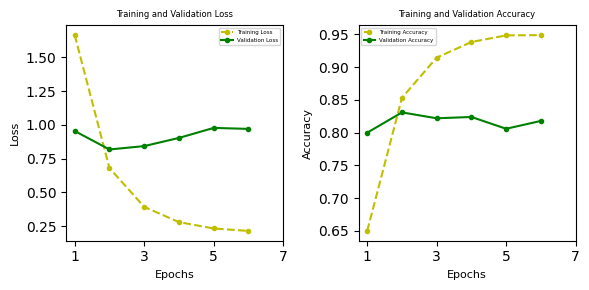



------------------------------------------------------------------------------------------------


In [57]:
# the following code is used to increase the output cell height, and it was found on Stack Overflow
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 20000})'''))

for valA in range(len(outputsFinal)):
  for valB in range(len(dropoutsFinal)):
    for valC in range(len(lRateFinal)):
      for valD in range(len(optimizersFinal)):
        print("Outputs: ", outputsFinal[valA], "Dropout: ", dropoutsFinal[valB], "LearningRate: ", lRateFinal[valC])
        modelOptTrain = keras.Sequential([
          layers.Dense(outputsFinal[valA], activation = "selu"),
          layers.Dropout(dropoutsFinal[valB]),
          layers.Dense(outputsFinal[valA], activation = "selu"),
          layers.Dropout(dropoutsFinal[valB]),
          layers.Dense(46, activation = "softmax")
          ])
        if optimizersFinal[valD] == "RMSprop":
          print("RMSprop")
          modelOptTrain.compile(optimizer = keras.optimizers.RMSprop(lRateCombined[valC]), loss = 'categorical_crossentropy', metrics = ['accuracy'])
        elif optimizersFinal[valD] == "Adadelta":
          print("Adadelta")
          modelOptTrain.compile(optimizer = keras.optimizers.Adadelta(lRateCombined[valC]), loss = 'categorical_crossentropy', metrics = ['accuracy'])
        else:
          print("Nadam")
          modelOptTrain.compile(optimizer = keras.optimizers.Nadam(lRateCombined[valC]), loss = 'categorical_crossentropy', metrics = ['accuracy'])

        historyOptFinal = modelOptFinal(modelOptTrain)
        print()

        lossOptFinal = historyOptFinal.history["loss"]
        accOptFinal = historyOptFinal.history["accuracy"]
        valLossOptFinal = historyOptFinal.history["val_loss"]
        valAccOptFinal = historyOptFinal.history["val_accuracy"]
        epochs = range(1, len(lossOptFinal) + 1)

        #plotTitle = str(activation1[x]) + ", Softmax" +  ", RMSprop"
        #batchSize = str(batchSizing[x])
        plotOptFinal()
        print()
        gc.collect()
        print()
        print("------------------------------------------------------------------------------------------------")

Examining the output above, it is clear that the Adadelta optimizer is not applicable for this dataset.
In comparison, both RMSprop and Nadam achieved consistent validation accuracy results greater than 80%. However, for each iteration of equivalent outputs, dropout levels and learning rates, RMSprop would score slightly better for validation accuracy than Nadam. Additionally, RMSprop would occasionally score 83% while Nadam did not.
In summary, the best results for RMSprop appear to be:
- 96 output units
- 0.3 dropout rate
- 0.002 learning rate

In [58]:
modelRMSpropTest = keras.Sequential([
  layers.Dense(96, activation = 'relu'),
  layers.Dropout(0.3),
  layers.Dense(96, activation = 'relu'),
  layers.Dropout(0.3),
  layers.Dense(46, activation = 'softmax')])
modelRMSpropTest.compile(keras.optimizers.RMSprop(0.002), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = modelRMSpropTest.fit(partialXtrain, partialYtrain, epochs = 20, batch_size = 256, validation_data = (xVal, yVal), verbose = 0, callbacks=[EpochOutput(interval = 1)])


Epoch:   0 | Loss: 1.9112e+00 | Accuracy: 5.7818e-01 | Validation loss: 1.2742e+00 | Validation accuracy: 7.0400e-01
Epoch:   1 | Loss: 1.1476e+00 | Accuracy: 7.3503e-01 | Validation loss: 1.0504e+00 | Validation accuracy: 7.6600e-01
Epoch:   2 | Loss: 8.7511e-01 | Accuracy: 7.9667e-01 | Validation loss: 9.5249e-01 | Validation accuracy: 7.9100e-01
Epoch:   3 | Loss: 6.8376e-01 | Accuracy: 8.3763e-01 | Validation loss: 8.8465e-01 | Validation accuracy: 8.1000e-01
Epoch:   4 | Loss: 5.1969e-01 | Accuracy: 8.7635e-01 | Validation loss: 9.0553e-01 | Validation accuracy: 8.1600e-01
Epoch:   5 | Loss: 4.3220e-01 | Accuracy: 8.9752e-01 | Validation loss: 8.5604e-01 | Validation accuracy: 8.2000e-01
Epoch:   6 | Loss: 3.5318e-01 | Accuracy: 9.1594e-01 | Validation loss: 8.9289e-01 | Validation accuracy: 8.2900e-01
Epoch:   7 | Loss: 3.0346e-01 | Accuracy: 9.2709e-01 | Validation loss: 8.7647e-01 | Validation accuracy: 8.3000e-01
Epoch:   8 | Loss: 2.7145e-01 | Accuracy: 9.2884e-01 | Validatio

As can be seen in the above output, **the validation accuracry peaks at epoch 5 and 6**, which is the expect number of epochs based on all the training that has taken place.

A final training step will be done using the concatenated training and validating data. As shown below, the samples after concatenation now total 8,982, which is the initial training / test split of 80% / 20%.

In [59]:
xCombined = np.concatenate((partialXtrain, xVal), axis = 0)
yCombined = np.concatenate((partialYtrain, yVal), axis = 0)
print(len(xCombined), len(yCombined))

8982 8982


Using the best results from above, one final model will be run on the concatenated training and validation data, using:

- RMSprop optimizaer
- 96 output units
- batch size of 256
- 20 epochs

This model reaches 90% accuracy after 6 epochs, and gradually increases to 95% accuracy after 20 epochs. It is not any different than the training + validation model above.

In [60]:
modelRMSfinalTrain = keras.Sequential([
  layers.Dense(96, activation = 'relu'),
  layers.Dropout(0.3),
  layers.Dense(96, activation = 'relu'),
  layers.Dropout(0.3),
  layers.Dense(46, activation = 'softmax')])
modelRMSfinalTrain.compile(keras.optimizers.RMSprop(0.002), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = modelRMSfinalTrain.fit(xCombined, yCombined, epochs = 20, batch_size = 256, verbose = 1)


Epoch 1/20
36/36 [==============================] - 1s 19ms/step - loss: 1.7453 - accuracy: 0.5965
Epoch 2/20
36/36 [==============================] - 1s 19ms/step - loss: 1.0693 - accuracy: 0.7540
Epoch 3/20
36/36 [==============================] - 1s 18ms/step - loss: 0.7822 - accuracy: 0.8179
Epoch 4/20
36/36 [==============================] - 1s 18ms/step - loss: 0.5967 - accuracy: 0.8606
Epoch 5/20
36/36 [==============================] - 1s 18ms/step - loss: 0.4704 - accuracy: 0.8880
Epoch 6/20
36/36 [==============================] - 1s 19ms/step - loss: 0.3767 - accuracy: 0.9108
Epoch 7/20
36/36 [==============================] - 1s 19ms/step - loss: 0.3221 - accuracy: 0.9216
Epoch 8/20
36/36 [==============================] - 1s 21ms/step - loss: 0.2765 - accuracy: 0.9312
Epoch 9/20
36/36 [==============================] - 1s 18ms/step - loss: 0.2483 - accuracy: 0.9384
Epoch 10/20
36/36 [==============================] - 1s 20ms/step - loss: 0.2166 - accuracy: 0.9458
Epoch 11/

<a name="section8"></a>
### **Section 8 >> Testing**

Using the 'modelRMSfinalTrain', it will now be evaluated **for the first time** using the test data. The test data is the vectorized data, 'test_data' and 'test_labels'.

As shown below, the test results achieve an accuracy of 80%, which is significantly better than the prediction goal of 19% (common baseline), as defined in Section 1.3.


In [61]:
testResults = modelRMSfinalTrain.evaluate(xTest, yTest)

71/71 [==============================] - 0s 2ms/step - loss: 1.3114 - accuracy: 0.8019


In [62]:
print(testResults)

[1.3113501071929932, 0.8018699884414673]


Below are the first 20 newswire, with the prediction from the final training model, and the actual 'ground truth' listed. As can be seen, the first three predictions are correct, while prediction #3 and #4 do not match the ground truth. **Overall, for the first 20 predictions, 16 were correct and 4 incorrect, for an accuracy of 80%.**

Next will be printed the one of the incorrect outputs.

In [63]:
predictions = modelRMSfinalTrain.predict(xTest)
print('Newswire', '\t', 'Prediction', '\t', 'GroundTruth')
for i in range(20):
  pred = np.argmax(predictions[i])
  testL = test_labels[i]
  print(i, '\t', '\t', pred, '\t', '\t', testL)

71/71 [==============================] - 0s 2ms/step
Newswire 	 Prediction 	 GroundTruth
0 	 	 3 	 	 3
1 	 	 10 	 	 10
2 	 	 1 	 	 1
3 	 	 16 	 	 4
4 	 	 13 	 	 4
5 	 	 3 	 	 3
6 	 	 3 	 	 3
7 	 	 3 	 	 3
8 	 	 3 	 	 3
9 	 	 3 	 	 3
10 	 	 1 	 	 5
11 	 	 4 	 	 4
12 	 	 1 	 	 1
13 	 	 3 	 	 3
14 	 	 1 	 	 1
15 	 	 11 	 	 11
16 	 	 3 	 	 23
17 	 	 3 	 	 3
18 	 	 19 	 	 19
19 	 	 3 	 	 3


Looking at newswire 3, the actual content is listed below.

In [64]:
word_index = reuters.get_word_index()
reverse_word_index = dict ([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in test_data[3]])
print(decoded_newswire)

? ? ? oil and gas partnership said it completed the sale of interests in two major oil and gas fields to lt energy assets international corp for 21 mln dlrs the company said it sold about one half of its 50 pct interest in the oak hill and north ? fields its two largest producing properties it said it used about 20 mln dlrs of the proceeds to ? principal on its senior secured notes semi annual principal payments on the remaining 40 mln dlrs of notes have been satisfied until december 1988 as a result it said the company said the note agreements were amended to reflect an easing of some financial covenants and an increase of interest to 13 5 pct from 13 0 pct until december 1990 it said the ? exercise price for 1 125 000 warrants was also reduced to 50 cts from 1 50 dlrs the company said energy assets agreed to share the costs of increasing production at the oak hill field reuter 3


In [65]:
print("Prediction: ", topics[16], "Ground Trust: ", topics[4])

Prediction:  crude Ground Trust:  acq


Reading the newswire, the first few works relate to energy. Therefore, it is reasonable that the model would make a prediction of "crude" (i.e., crude oil). However, reading further into the newswire, the focus of the content is on one company selling 'two major oil and gas fields' to another company. The ground truth is labelled as "acq" (i.e., acquisitions).

# Summary

In Summary, the final model significantly exceed the prediction goal (common baseline) of ~19%, achieving an accuracy of 80%.